<a href="https://colab.research.google.com/github/feandrad/fiap-pos/blob/main/FIAP_POS_Trabalho_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- 1. CRIAR O DATAFRAME DIRETO (sem MySQL) ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

# Dados retirados de Medical Cost Personal Dataset (Kaggle) https://www.kaggle.com/datasets/mirichoi0218/insurance
pacientes = [
    (19,"female",27.9,0,True,"southwest",16884.924),
    (18,"male",33.77,1,False,"southeast",1725.5523),
    (28,"male",33,3,False,"southeast",4449.462),
    (33,"male",22.705,0,False,"northwest",21984.47061),
    (32,"male",28.88,0,False,"northwest",3866.8552),
    (31,"female",25.74,0,False,"southeast",3756.6216),
    (46,"female",33.44,1,False,"southeast",8240.5896),
    (37,"female",27.74,3,False,"northwest",7281.5056),
    (37,"male",29.83,2,False,"northeast",6406.4107),
    (60,"female",25.84,0,False,"northwest",28923.13692),
    (25,"male",26.22,0,False,"northeast",2721.3208),
    (62,"female",26.29,0,True,"southeast",27808.7251),
    (23,"male",34.4,0,False,"southwest",1826.843),
    (56,"female",39.82,0,False,"southeast",11090.7178),
    (27,"male",42.13,0,True,"southeast",39611.7577),
    (19,"male",24.6,1,False,"southwest",1837.237),
    (52,"female",30.78,1,False,"northeast",10797.3362),
    (23,"male",23.845,0,False,"northeast",2395.17155),
    (56,"male",40.3,0,False,"southwest",10602.385),
    (30,"male",35.3,0,True,"southwest",36837.467),
    (60,"female",36.005,0,False,"northeast",13228.84695),
    (30,"female",32.4,1,False,"southwest",4149.736),
    (18,"male",34.1,0,False,"southeast",1137.011),
    (34,"female",31.92,1,True,"northeast",37701.8768),
    (37,"male",28.025,2,False,"northwest",6203.90175),
    (59,"female",27.72,3,False,"southeast",14001.1338),
    (63,"female",23.085,0,False,"northeast",14451.83515),
    (55,"female",32.775,2,False,"northwest",12268.63225),
    (23,"male",17.385,1,False,"northwest",2775.19215),
    (31,"male",36.3,2,True,"southwest",38711),
    (22,"male",35.6,0,True,"southwest",35585.576),
    (18,"female",26.315,0,False,"northeast",2198.18985),
    (19,"female",28.6,5,False,"southwest",4687.797),
    (63,"male",28.31,0,False,"northwest",13770.0979),
    (28,"male",36.4,1,True,"southwest",51194.55914),
    (19,"male",20.425,0,False,"northwest",1625.43375),
    (62,"female",32.965,3,False,"northwest",15612.19335),
    (26,"male",20.8,0,False,"southwest",2302.3),
    (35,"male",36.67,1,True,"northeast",39774.2763),
    (60,"male",39.9,0,True,"southwest",48173.361),
    (24,"female",26.6,0,False,"northeast",3046.062),
    (31,"female",36.63,2,False,"southeast",4949.7587),
    (41,"male",21.78,1,False,"southeast",6272.4772),
    (37,"female",30.8,2,False,"southeast",6313.759),
    (38,"male",37.05,1,False,"northeast",6079.6715),
    (55,"male",37.3,0,False,"southwest",20630.28351),
    (18,"female",38.665,2,False,"northeast",3393.35635),
    (28,"female",34.77,0,False,"northwest",3556.9223),
    (60,"female",24.53,0,False,"southeast",12629.8967),
    (36,"male",35.2,1,True,"southeast",38709.176),
    (18,"female",35.625,0,False,"northeast",2211.13075),
    (21,"female",33.63,2,False,"northwest",3579.8287),
    (48,"male",28,1,True,"southwest",23568.272),
    (36,"male",34.43,0,True,"southeast",37742.5757),
    (40,"female",28.69,3,False,"northwest",8059.6791),
    (58,"male",36.955,2,True,"northwest",47496.49445),
    (58,"female",31.825,2,False,"northeast",13607.36875),
    (18,"male",31.68,2,True,"southeast",34303.1672),
    (53,"female",22.88,1,True,"southeast",23244.7902),
    (34,"female",37.335,2,False,"northwest",5989.52365),
    (43,"male",27.36,3,False,"northeast",8606.2174),
    (25,"male",33.66,4,False,"southeast",4504.6624),
    (64,"male",24.7,1,False,"northwest",30166.61817),
    (28,"female",25.935,1,False,"northwest",4133.64165),
    (20,"female",22.42,0,True,"northwest",14711.7438),
    (19,"female",28.9,0,False,"southwest",1743.214),
    (61,"female",39.1,2,False,"southwest",14235.072),
    (40,"male",26.315,1,False,"northwest",6389.37785),
    (40,"female",36.19,0,False,"southeast",5920.1041),
    (28,"male",23.98,3,True,"southeast",17663.1442),
    (27,"female",24.75,0,True,"southeast",16577.7795),
    (31,"male",28.5,5,False,"northeast",6799.458),
    (53,"female",28.1,3,False,"southwest",11741.726),
    (58,"male",32.01,1,False,"southeast",11946.6259),
    (44,"male",27.4,2,False,"southwest",7726.854),
    (57,"male",34.01,0,False,"northwest",11356.6609),
    (29,"female",29.59,1,False,"southeast",3947.4131),
    (21,"male",35.53,0,False,"southeast",1532.4697),
    (22,"female",39.805,0,False,"northeast",2755.02095),
    (41,"female",32.965,0,False,"northwest",6571.02435),
    (31,"male",26.885,1,False,"northeast",4441.21315),
    (45,"female",38.285,0,False,"northeast",7935.29115),
    (22,"male",37.62,1,True,"southeast",37165.1638),
    (48,"female",41.23,4,False,"northwest",11033.6617),
    (37,"female",34.8,2,True,"southwest",39836.519),
    (45,"male",22.895,2,True,"northwest",21098.55405),
    (57,"female",31.16,0,True,"northwest",43578.9394),
    (56,"female",27.2,0,False,"southwest",11073.176),
    (46,"female",27.74,0,False,"northwest",8026.6666),
    (55,"female",26.98,0,False,"northwest",11082.5772),
    (21,"female",39.49,0,False,"southeast",2026.9741),
    (53,"female",24.795,1,False,"northwest",10942.13205),
    (59,"male",29.83,3,True,"northeast",30184.9367),
    (35,"male",34.77,2,False,"northwest",5729.0053),
    (64,"female",31.3,2,True,"southwest",47291.055),
    (28,"female",37.62,1,False,"southeast",3766.8838),
    (54,"female",30.8,3,False,"southwest",12105.32),
    (55,"male",38.28,0,False,"southeast",10226.2842),
    (56,"male",19.95,0,True,"northeast",22412.6485),
    (38,"male",19.3,0,True,"southwest",15820.699),
    (41,"female",31.6,0,False,"southwest",6186.127),
    (30,"male",25.46,0,False,"northeast",3645.0894),
    (18,"female",30.115,0,False,"northeast",21344.8467),
    (61,"female",29.92,3,True,"southeast",30942.1918),
    (34,"female",27.5,1,False,"southwest",5003.853),
    (20,"male",28.025,1,True,"northwest",17560.37975),
    (19,"female",28.4,1,False,"southwest",2331.519),
    (26,"male",30.875,2,False,"northwest",3877.30425),
    (29,"male",27.94,0,False,"southeast",2867.1196),
    (63,"male",35.09,0,True,"southeast",47055.5321),
    (54,"male",33.63,1,False,"northwest",10825.2537),
    (55,"female",29.7,2,False,"southwest",11881.358),
    (37,"male",30.8,0,False,"southwest",4646.759),
    (21,"female",35.72,0,False,"northwest",2404.7338),
    (52,"male",32.205,3,False,"northeast",11488.31695),
    (60,"male",28.595,0,False,"northeast",30259.99556),
    (58,"male",49.06,0,False,"southeast",11381.3254),
    (29,"female",27.94,1,True,"southeast",19107.7796),
    (49,"female",27.17,0,False,"southeast",8601.3293),
    (37,"female",23.37,2,False,"northwest",6686.4313),
    (44,"male",37.1,2,False,"southwest",7740.337),
    (18,"male",23.75,0,False,"northeast",1705.6245),
    (20,"female",28.975,0,False,"northwest",2257.47525),
    (44,"male",31.35,1,True,"northeast",39556.4945),
    (47,"female",33.915,3,False,"northwest",10115.00885),
    (26,"female",28.785,0,False,"northeast",3385.39915),
    (19,"female",28.3,0,True,"southwest",17081.08),
    (52,"female",37.4,0,False,"southwest",9634.538),
    (32,"female",17.765,2,True,"northwest",32734.1863),
    (38,"male",34.7,2,False,"southwest",6082.405),
    (59,"female",26.505,0,False,"northeast",12815.44495),
    (61,"female",22.04,0,False,"northeast",13616.3586),
    (53,"female",35.9,2,False,"southwest",11163.568),
    (19,"male",25.555,0,False,"northwest",1632.56445),
    (20,"female",28.785,0,False,"northeast",2457.21115),
    (22,"female",28.05,0,False,"southeast",2155.6815),
    (19,"male",34.1,0,False,"southwest",1261.442),
    (22,"male",25.175,0,False,"northwest",2045.68525),
    (54,"female",31.9,3,False,"southeast",27322.73386),
    (22,"female",36,0,False,"southwest",2166.732),
    (34,"male",22.42,2,False,"northeast",27375.90478),
    (26,"male",32.49,1,False,"northeast",3490.5491),
    (34,"male",25.3,2,True,"southeast",18972.495),
    (29,"male",29.735,2,False,"northwest",18157.876),
    (30,"male",28.69,3,True,"northwest",20745.9891),
    (29,"female",38.83,3,False,"southeast",5138.2567),
    (46,"male",30.495,3,True,"northwest",40720.55105),
    (51,"female",37.73,1,False,"southeast",9877.6077),
    (53,"female",37.43,1,False,"northwest",10959.6947),
    (19,"male",28.4,1,False,"southwest",1842.519),
    (35,"male",24.13,1,False,"northwest",5125.2157),
    (48,"male",29.7,0,False,"southeast",7789.635),
    (32,"female",37.145,3,False,"northeast",6334.34355),
    (42,"female",23.37,0,True,"northeast",19964.7463),
    (40,"female",25.46,1,False,"northeast",7077.1894),
    (44,"male",39.52,0,False,"northwest",6948.7008),
    (48,"male",24.42,0,True,"southeast",21223.6758),
    (18,"male",25.175,0,True,"northeast",15518.18025),
    (30,"male",35.53,0,True,"southeast",36950.2567),
    (50,"female",27.83,3,False,"southeast",19749.38338),
    (42,"female",26.6,0,True,"northwest",21348.706),
    (18,"female",36.85,0,True,"southeast",36149.4835),
    (54,"male",39.6,1,False,"southwest",10450.552),
    (32,"female",29.8,2,False,"southwest",5152.134),
    (37,"male",29.64,0,False,"northwest",5028.1466),
    (47,"male",28.215,4,False,"northeast",10407.08585),
    (20,"female",37,5,False,"southwest",4830.63),
    (32,"female",33.155,3,False,"northwest",6128.79745),
    (19,"female",31.825,1,False,"northwest",2719.27975),
    (27,"male",18.905,3,False,"northeast",4827.90495),
    (63,"male",41.47,0,False,"southeast",13405.3903),
    (49,"male",30.3,0,False,"southwest",8116.68),
    (18,"male",15.96,0,False,"northeast",1694.7964),
    (35,"female",34.8,1,False,"southwest",5246.047),
    (24,"female",33.345,0,False,"northwest",2855.43755),
    (63,"female",37.7,0,True,"southwest",48824.45),
    (38,"male",27.835,2,False,"northwest",6455.86265),
    (54,"male",29.2,1,False,"southwest",10436.096),
    (46,"female",28.9,2,False,"southwest",8823.279),
    (41,"female",33.155,3,False,"northeast",8538.28845),
    (58,"male",28.595,0,False,"northwest",11735.87905),
    (18,"female",38.28,0,False,"southeast",1631.8212),
    (22,"male",19.95,3,False,"northeast",4005.4225),
    (44,"female",26.41,0,False,"northwest",7419.4779),
    (44,"male",30.69,2,False,"southeast",7731.4271),
    (36,"male",41.895,3,True,"northeast",43753.33705),
    (26,"female",29.92,2,False,"southeast",3981.9768),
    (30,"female",30.9,3,False,"southwest",5325.651),
    (41,"female",32.2,1,False,"southwest",6775.961),
    (29,"female",32.11,2,False,"northwest",4922.9159),
    (61,"male",31.57,0,False,"southeast",12557.6053),
    (36,"female",26.2,0,False,"southwest",4883.866),
    (25,"male",25.74,0,False,"southeast",2137.6536),
    (56,"female",26.6,1,False,"northwest",12044.342),
    (18,"male",34.43,0,False,"southeast",1137.4697),
    (19,"male",30.59,0,False,"northwest",1639.5631),
    (39,"female",32.8,0,False,"southwest",5649.715),
    (45,"female",28.6,2,False,"southeast",8516.829),
    (51,"female",18.05,0,False,"northwest",9644.2525),
    (64,"female",39.33,0,False,"northeast",14901.5167),
    (19,"female",32.11,0,False,"northwest",2130.6759),
    (48,"female",32.23,1,False,"southeast",8871.1517),
    (60,"female",24.035,0,False,"northwest",13012.20865),
    (27,"female",36.08,0,True,"southeast",37133.8982),
    (46,"male",22.3,0,False,"southwest",7147.105),
    (28,"female",28.88,1,False,"northeast",4337.7352),
    (59,"male",26.4,0,False,"southeast",11743.299),
    (35,"male",27.74,2,True,"northeast",20984.0936),
    (63,"female",31.8,0,False,"southwest",13880.949),
    (40,"male",41.23,1,False,"northeast",6610.1097),
    (20,"male",33,1,False,"southwest",1980.07),
    (40,"male",30.875,4,False,"northwest",8162.71625),
    (24,"male",28.5,2,False,"northwest",3537.703),
    (34,"female",26.73,1,False,"southeast",5002.7827),
    (45,"female",30.9,2,False,"southwest",8520.026),
    (41,"female",37.1,2,False,"southwest",7371.772),
    (53,"female",26.6,0,False,"northwest",10355.641),
    (27,"male",23.1,0,False,"southeast",2483.736),
    (26,"female",29.92,1,False,"southeast",3392.9768),
    (24,"female",23.21,0,False,"southeast",25081.76784),
    (34,"female",33.7,1,False,"southwest",5012.471),
    (53,"female",33.25,0,False,"northeast",10564.8845),
    (32,"male",30.8,3,False,"southwest",5253.524),
    (19,"male",34.8,0,True,"southwest",34779.615),
    (42,"male",24.64,0,True,"southeast",19515.5416),
    (55,"male",33.88,3,False,"southeast",11987.1682),
    (28,"male",38.06,0,False,"southeast",2689.4954),
    (58,"female",41.91,0,False,"southeast",24227.33724),
    (41,"female",31.635,1,False,"northeast",7358.17565),
    (47,"male",25.46,2,False,"northeast",9225.2564),
    (42,"female",36.195,1,False,"northwest",7443.64305),
    (59,"female",27.83,3,False,"southeast",14001.2867),
    (19,"female",17.8,0,False,"southwest",1727.785),
    (59,"male",27.5,1,False,"southwest",12333.828),
    (39,"male",24.51,2,False,"northwest",6710.1919),
    (40,"female",22.22,2,True,"southeast",19444.2658),
    (18,"female",26.73,0,False,"southeast",1615.7667),
    (31,"male",38.39,2,False,"southeast",4463.2051),
    (19,"male",29.07,0,True,"northwest",17352.6803),
    (44,"male",38.06,1,False,"southeast",7152.6714),
    (23,"female",36.67,2,True,"northeast",38511.6283),
    (33,"female",22.135,1,False,"northeast",5354.07465),
    (55,"female",26.8,1,False,"southwest",35160.13457),
    (40,"male",35.3,3,False,"southwest",7196.867),
    (63,"female",27.74,0,True,"northeast",29523.1656),
    (54,"male",30.02,0,False,"northwest",24476.47851),
    (60,"female",38.06,0,False,"southeast",12648.7034),
    (24,"male",35.86,0,False,"southeast",1986.9334),
    (19,"male",20.9,1,False,"southwest",1832.094),
    (29,"male",28.975,1,False,"northeast",4040.55825),
    (18,"male",17.29,2,True,"northeast",12829.4551),
    (63,"female",32.2,2,True,"southwest",47305.305),
    (54,"male",34.21,2,True,"southeast",44260.7499),
    (27,"male",30.3,3,False,"southwest",4260.744),
    (50,"male",31.825,0,True,"northeast",41097.16175),
    (55,"female",25.365,3,False,"northeast",13047.33235),
    (56,"male",33.63,0,True,"northwest",43921.1837),
    (38,"female",40.15,0,False,"southeast",5400.9805),
    (51,"male",24.415,4,False,"northwest",11520.09985),
    (19,"male",31.92,0,True,"northwest",33750.2918),
    (58,"female",25.2,0,False,"southwest",11837.16),
    (20,"female",26.84,1,True,"southeast",17085.2676),
    (52,"male",24.32,3,True,"northeast",24869.8368),
    (19,"male",36.955,0,True,"northwest",36219.40545),
    (53,"female",38.06,3,False,"southeast",20462.99766),
    (46,"male",42.35,3,True,"southeast",46151.1245),
    (40,"male",19.8,1,True,"southeast",17179.522),
    (59,"female",32.395,3,False,"northeast",14590.63205),
    (45,"male",30.2,1,False,"southwest",7441.053),
    (49,"male",25.84,1,False,"northeast",9282.4806),
    (18,"male",29.37,1,False,"southeast",1719.4363),
    (50,"male",34.2,2,True,"southwest",42856.838),
    (41,"male",37.05,2,False,"northwest",7265.7025),
    (50,"male",27.455,1,False,"northeast",9617.66245),
    (25,"male",27.55,0,False,"northwest",2523.1695),
    (47,"female",26.6,2,False,"northeast",9715.841),
    (19,"male",20.615,2,False,"northwest",2803.69785),
    (22,"female",24.3,0,False,"southwest",2150.469),
    (59,"male",31.79,2,False,"southeast",12928.7911),
    (51,"female",21.56,1,False,"southeast",9855.1314),
    (40,"female",28.12,1,True,"northeast",22331.5668),
    (54,"male",40.565,3,True,"northeast",48549.17835),
    (30,"male",27.645,1,False,"northeast",4237.12655),
    (55,"female",32.395,1,False,"northeast",11879.10405),
    (52,"female",31.2,0,False,"southwest",9625.92),
    (46,"male",26.62,1,False,"southeast",7742.1098),
    (46,"female",48.07,2,False,"northeast",9432.9253),
    (63,"female",26.22,0,False,"northwest",14256.1928),
    (59,"female",36.765,1,True,"northeast",47896.79135),
    (52,"male",26.4,3,False,"southeast",25992.82104),
    (28,"female",33.4,0,False,"southwest",3172.018),
    (29,"male",29.64,1,False,"northeast",20277.80751),
    (25,"male",45.54,2,True,"southeast",42112.2356),
    (22,"female",28.82,0,False,"southeast",2156.7518),
    (25,"male",26.8,3,False,"southwest",3906.127),
    (18,"male",22.99,0,False,"northeast",1704.5681),
    (19,"male",27.7,0,True,"southwest",16297.846),
    (47,"male",25.41,1,True,"southeast",21978.6769),
    (31,"male",34.39,3,True,"northwest",38746.3551),
    (48,"female",28.88,1,False,"northwest",9249.4952),
    (36,"male",27.55,3,False,"northeast",6746.7425),
    (53,"female",22.61,3,True,"northeast",24873.3849),
    (56,"female",37.51,2,False,"southeast",12265.5069),
    (28,"female",33,2,False,"southeast",4349.462),
    (57,"female",38,2,False,"southwest",12646.207),
    (29,"male",33.345,2,False,"northwest",19442.3535),
    (28,"female",27.5,2,False,"southwest",20177.67113),
    (30,"female",33.33,1,False,"southeast",4151.0287),
    (58,"male",34.865,0,False,"northeast",11944.59435),
    (41,"female",33.06,2,False,"northwest",7749.1564),
    (50,"male",26.6,0,False,"southwest",8444.474),
    (19,"female",24.7,0,False,"southwest",1737.376),
    (43,"male",35.97,3,True,"southeast",42124.5153),
    (49,"male",35.86,0,False,"southeast",8124.4084),
    (27,"female",31.4,0,True,"southwest",34838.873),
    (52,"male",33.25,0,False,"northeast",9722.7695),
    (50,"male",32.205,0,False,"northwest",8835.26495),
    (54,"male",32.775,0,False,"northeast",10435.06525),
    (44,"female",27.645,0,False,"northwest",7421.19455),
    (32,"male",37.335,1,False,"northeast",4667.60765),
    (34,"male",25.27,1,False,"northwest",4894.7533),
    (26,"female",29.64,4,False,"northeast",24671.66334),
    (34,"male",30.8,0,True,"southwest",35491.64),
    (57,"male",40.945,0,False,"northeast",11566.30055),
    (29,"male",27.2,0,False,"southwest",2866.091),
    (40,"male",34.105,1,False,"northeast",6600.20595),
    (27,"female",23.21,1,False,"southeast",3561.8889),
    (45,"male",36.48,2,True,"northwest",42760.5022),
    (64,"female",33.8,1,True,"southwest",47928.03),
    (52,"male",36.7,0,False,"southwest",9144.565),
    (61,"female",36.385,1,True,"northeast",48517.56315),
    (52,"male",27.36,0,True,"northwest",24393.6224),
    (61,"female",31.16,0,False,"northwest",13429.0354),
    (56,"female",28.785,0,False,"northeast",11658.37915),
    (43,"female",35.72,2,False,"northeast",19144.57652),
    (64,"male",34.5,0,False,"southwest",13822.803),
    (60,"male",25.74,0,False,"southeast",12142.5786),
    (62,"male",27.55,1,False,"northwest",13937.6665),
    (50,"male",32.3,1,True,"northeast",41919.097),
    (46,"female",27.72,1,False,"southeast",8232.6388),
    (24,"female",27.6,0,False,"southwest",18955.22017),
    (62,"male",30.02,0,False,"northwest",13352.0998),
    (60,"female",27.55,0,False,"northeast",13217.0945),
    (63,"male",36.765,0,False,"northeast",13981.85035),
    (49,"female",41.47,4,False,"southeast",10977.2063),
    (34,"female",29.26,3,False,"southeast",6184.2994),
    (33,"male",35.75,2,False,"southeast",4889.9995),
    (46,"male",33.345,1,False,"northeast",8334.45755),
    (36,"female",29.92,1,False,"southeast",5478.0368),
    (19,"male",27.835,0,False,"northwest",1635.73365),
    (57,"female",23.18,0,False,"northwest",11830.6072),
    (50,"female",25.6,0,False,"southwest",8932.084),
    (30,"female",27.7,0,False,"southwest",3554.203),
    (33,"male",35.245,0,False,"northeast",12404.8791),
    (18,"female",38.28,0,False,"southeast",14133.03775),
    (46,"male",27.6,0,False,"southwest",24603.04837),
    (46,"male",43.89,3,False,"southeast",8944.1151),
    (47,"male",29.83,3,False,"northwest",9620.3307),
    (23,"male",41.91,0,False,"southeast",1837.2819),
    (18,"female",20.79,0,False,"southeast",1607.5101),
    (48,"female",32.3,2,False,"northeast",10043.249),
    (35,"male",30.5,1,False,"southwest",4751.07),
    (19,"female",21.7,0,True,"southwest",13844.506),
    (21,"female",26.4,1,False,"southwest",2597.779),
    (21,"female",21.89,2,False,"southeast",3180.5101),
    (49,"female",30.78,1,False,"northeast",9778.3472),
    (56,"female",32.3,3,False,"northeast",13430.265),
    (42,"female",24.985,2,False,"northwest",8017.06115),
    (44,"male",32.015,2,False,"northwest",8116.26885),
    (18,"male",30.4,3,False,"northeast",3481.868),
    (61,"female",21.09,0,False,"northwest",13415.0381),
    (57,"female",22.23,0,False,"northeast",12029.2867),
    (42,"female",33.155,1,False,"northeast",7639.41745),
    (26,"male",32.9,2,True,"southwest",36085.219),
    (20,"male",33.33,0,False,"southeast",1391.5287),
    (23,"female",28.31,0,True,"northwest",18033.9679),
    (39,"female",24.89,3,True,"northeast",21659.9301),
    (24,"male",40.15,0,True,"southeast",38126.2465),
    (64,"female",30.115,3,False,"northwest",16455.70785),
    (62,"male",31.46,1,False,"southeast",27000.98473),
    (27,"female",17.955,2,True,"northeast",15006.57945),
    (55,"male",30.685,0,True,"northeast",42303.69215),
    (55,"male",33,0,False,"southeast",20781.48892),
    (35,"female",43.34,2,False,"southeast",5846.9176),
    (44,"male",22.135,2,False,"northeast",8302.53565),
    (19,"male",34.4,0,False,"southwest",1261.859),
    (58,"female",39.05,0,False,"southeast",11856.4115),
    (50,"male",25.365,2,False,"northwest",30284.64294),
    (26,"female",22.61,0,False,"northwest",3176.8159),
    (24,"female",30.21,3,False,"northwest",4618.0799),
    (48,"male",35.625,4,False,"northeast",10736.87075),
    (19,"female",37.43,0,False,"northwest",2138.0707),
    (48,"male",31.445,1,False,"northeast",8964.06055),
    (49,"male",31.35,1,False,"northeast",9290.1395),
    (46,"female",32.3,2,False,"northeast",9411.005),
    (46,"male",19.855,0,False,"northwest",7526.70645),
    (43,"female",34.4,3,False,"southwest",8522.003),
    (21,"male",31.02,0,False,"southeast",16586.49771),
    (64,"male",25.6,2,False,"southwest",14988.432),
    (18,"female",38.17,0,False,"southeast",1631.6683),
    (51,"female",20.6,0,False,"southwest",9264.797),
    (47,"male",47.52,1,False,"southeast",8083.9198),
    (64,"female",32.965,0,False,"northwest",14692.66935),
    (49,"male",32.3,3,False,"northwest",10269.46),
    (31,"male",20.4,0,False,"southwest",3260.199),
    (52,"female",38.38,2,False,"northeast",11396.9002),
    (33,"female",24.31,0,False,"southeast",4185.0979),
    (47,"female",23.6,1,False,"southwest",8539.671),
    (38,"male",21.12,3,False,"southeast",6652.5288),
    (32,"male",30.03,1,False,"southeast",4074.4537),
    (19,"male",17.48,0,False,"northwest",1621.3402),
    (44,"female",20.235,1,True,"northeast",19594.80965),
    (26,"female",17.195,2,True,"northeast",14455.64405),
    (25,"male",23.9,5,False,"southwest",5080.096),
    (19,"female",35.15,0,False,"northwest",2134.9015),
    (43,"female",35.64,1,False,"southeast",7345.7266),
    (52,"male",34.1,0,False,"southeast",9140.951),
    (36,"female",22.6,2,True,"southwest",18608.262),
    (64,"male",39.16,1,False,"southeast",14418.2804),
    (63,"female",26.98,0,True,"northwest",28950.4692),
    (64,"male",33.88,0,True,"southeast",46889.2612),
    (61,"male",35.86,0,True,"southeast",46599.1084),
    (40,"male",32.775,1,True,"northeast",39125.33225),
    (25,"male",30.59,0,False,"northeast",2727.3951),
    (48,"male",30.2,2,False,"southwest",8968.33),
    (45,"male",24.31,5,False,"southeast",9788.8659),
    (38,"female",27.265,1,False,"northeast",6555.07035),
    (18,"female",29.165,0,False,"northeast",7323.734819),
    (21,"female",16.815,1,False,"northeast",3167.45585),
    (27,"female",30.4,3,False,"northwest",18804.7524),
    (19,"male",33.1,0,False,"southwest",23082.95533),
    (29,"female",20.235,2,False,"northwest",4906.40965),
    (42,"male",26.9,0,False,"southwest",5969.723),
    (60,"female",30.5,0,False,"southwest",12638.195),
    (31,"male",28.595,1,False,"northwest",4243.59005),
    (60,"male",33.11,3,False,"southeast",13919.8229),
    (22,"male",31.73,0,False,"northeast",2254.7967),
    (35,"male",28.9,3,False,"southwest",5926.846),
    (52,"female",46.75,5,False,"southeast",12592.5345),
    (26,"male",29.45,0,False,"northeast",2897.3235),
    (31,"female",32.68,1,False,"northwest",4738.2682),
    (33,"female",33.5,0,True,"southwest",37079.372),
    (18,"male",43.01,0,False,"southeast",1149.3959),
    (59,"female",36.52,1,False,"southeast",28287.89766),
    (56,"male",26.695,1,True,"northwest",26109.32905),
    (45,"female",33.1,0,False,"southwest",7345.084),
    (60,"male",29.64,0,False,"northeast",12730.9996),
    (56,"female",25.65,0,False,"northwest",11454.0215),
    (40,"female",29.6,0,False,"southwest",5910.944),
    (35,"male",38.6,1,False,"southwest",4762.329),
    (39,"male",29.6,4,False,"southwest",7512.267),
    (30,"male",24.13,1,False,"northwest",4032.2407),
    (24,"male",23.4,0,False,"southwest",1969.614),
    (20,"male",29.735,0,False,"northwest",1769.53165),
    (32,"male",46.53,2,False,"southeast",4686.3887),
    (59,"male",37.4,0,False,"southwest",21797.0004),
    (55,"female",30.14,2,False,"southeast",11881.9696),
    (57,"female",30.495,0,False,"northwest",11840.77505),
    (56,"male",39.6,0,False,"southwest",10601.412),
    (40,"female",33,3,False,"southeast",7682.67),
    (49,"female",36.63,3,False,"southeast",10381.4787),
    (42,"male",30,0,True,"southwest",22144.032),
    (62,"female",38.095,2,False,"northeast",15230.32405),
    (56,"male",25.935,0,False,"northeast",11165.41765),
    (19,"male",25.175,0,False,"northwest",1632.03625),
    (30,"female",28.38,1,True,"southeast",19521.9682),
    (60,"female",28.7,1,False,"southwest",13224.693),
    (56,"female",33.82,2,False,"northwest",12643.3778),
    (28,"female",24.32,1,False,"northeast",23288.9284),
    (18,"female",24.09,1,False,"southeast",2201.0971),
    (27,"male",32.67,0,False,"southeast",2497.0383),
    (18,"female",30.115,0,False,"northeast",2203.47185),
    (19,"female",29.8,0,False,"southwest",1744.465),
    (47,"female",33.345,0,False,"northeast",20878.78443),
    (54,"male",25.1,3,True,"southwest",25382.297),
    (61,"male",28.31,1,True,"northwest",28868.6639),
    (24,"male",28.5,0,True,"northeast",35147.52848),
    (25,"male",35.625,0,False,"northwest",2534.39375),
    (21,"male",36.85,0,False,"southeast",1534.3045),
    (23,"male",32.56,0,False,"southeast",1824.2854),
    (63,"male",41.325,3,False,"northwest",15555.18875),
    (49,"male",37.51,2,False,"southeast",9304.7019),
    (18,"female",31.35,0,False,"southeast",1622.1885),
    (51,"female",39.5,1,False,"southwest",9880.068),
    (48,"male",34.3,3,False,"southwest",9563.029),
    (31,"female",31.065,0,False,"northeast",4347.02335),
    (54,"female",21.47,3,False,"northwest",12475.3513),
    (19,"male",28.7,0,False,"southwest",1253.936),
    (44,"female",38.06,0,True,"southeast",48885.13561),
    (53,"male",31.16,1,False,"northwest",10461.9794),
    (19,"female",32.9,0,False,"southwest",1748.774),
    (61,"female",25.08,0,False,"southeast",24513.09126),
    (18,"female",25.08,0,False,"northeast",2196.4732),
    (61,"male",43.4,0,False,"southwest",12574.049),
    (21,"male",25.7,4,True,"southwest",17942.106),
    (20,"male",27.93,0,False,"northeast",1967.0227),
    (31,"female",23.6,2,False,"southwest",4931.647),
    (45,"male",28.7,2,False,"southwest",8027.968),
    (44,"female",23.98,2,False,"southeast",8211.1002),
    (62,"female",39.2,0,False,"southwest",13470.86),
    (29,"male",34.4,0,True,"southwest",36197.699),
    (43,"male",26.03,0,False,"northeast",6837.3687),
    (51,"male",23.21,1,True,"southeast",22218.1149),
    (19,"male",30.25,0,True,"southeast",32548.3405),
    (38,"female",28.93,1,False,"southeast",5974.3847),
    (37,"male",30.875,3,False,"northwest",6796.86325),
    (22,"male",31.35,1,False,"northwest",2643.2685),
    (21,"male",23.75,2,False,"northwest",3077.0955),
    (24,"female",25.27,0,False,"northeast",3044.2133),
    (57,"female",28.7,0,False,"southwest",11455.28),
    (56,"male",32.11,1,False,"northeast",11763.0009),
    (27,"male",33.66,0,False,"southeast",2498.4144),
    (51,"male",22.42,0,False,"northeast",9361.3268),
    (19,"male",30.4,0,False,"southwest",1256.299),
    (39,"male",28.3,1,True,"southwest",21082.16),
    (58,"male",35.7,0,False,"southwest",11362.755),
    (20,"male",35.31,1,False,"southeast",27724.28875),
    (45,"male",30.495,2,False,"northwest",8413.46305),
    (35,"female",31,1,False,"southwest",5240.765),
    (31,"male",30.875,0,False,"northeast",3857.75925),
    (50,"female",27.36,0,False,"northeast",25656.57526),
    (32,"female",44.22,0,False,"southeast",3994.1778),
    (51,"female",33.915,0,False,"northeast",9866.30485),
    (38,"female",37.73,0,False,"southeast",5397.6167),
    (42,"male",26.07,1,True,"southeast",38245.59327),
    (18,"female",33.88,0,False,"southeast",11482.63485),
    (19,"female",30.59,2,False,"northwest",24059.68019),
    (51,"female",25.8,1,False,"southwest",9861.025),
    (46,"male",39.425,1,False,"northeast",8342.90875),
    (18,"male",25.46,0,False,"northeast",1708.0014),
    (57,"male",42.13,1,True,"southeast",48675.5177),
    (62,"female",31.73,0,False,"northeast",14043.4767),
    (59,"male",29.7,2,False,"southeast",12925.886),
    (37,"male",36.19,0,False,"southeast",19214.70553),
    (64,"male",40.48,0,False,"southeast",13831.1152),
    (38,"male",28.025,1,False,"northeast",6067.12675),
    (33,"female",38.9,3,False,"southwest",5972.378),
    (46,"female",30.2,2,False,"southwest",8825.086),
    (46,"female",28.05,1,False,"southeast",8233.0975),
    (53,"male",31.35,0,False,"southeast",27346.04207),
    (34,"female",38,3,False,"southwest",6196.448),
    (20,"female",31.79,2,False,"southeast",3056.3881),
    (63,"female",36.3,0,False,"southeast",13887.204),
    (54,"female",47.41,0,True,"southeast",63770.42801),
    (54,"male",30.21,0,False,"northwest",10231.4999),
    (49,"male",25.84,2,True,"northwest",23807.2406),
    (28,"male",35.435,0,False,"northeast",3268.84665),
    (54,"female",46.7,2,False,"southwest",11538.421),
    (25,"female",28.595,0,False,"northeast",3213.62205),
    (43,"female",46.2,0,True,"southeast",45863.205),
    (63,"male",30.8,0,False,"southwest",13390.559),
    (32,"female",28.93,0,False,"southeast",3972.9247),
    (62,"male",21.4,0,False,"southwest",12957.118),
    (52,"female",31.73,2,False,"northwest",11187.6567),
    (25,"female",41.325,0,False,"northeast",17878.90068),
    (28,"male",23.8,2,False,"southwest",3847.674),
    (46,"male",33.44,1,False,"northeast",8334.5896),
    (34,"male",34.21,0,False,"southeast",3935.1799),
    (35,"female",34.105,3,True,"northwest",39983.42595),
    (19,"male",35.53,0,False,"northwest",1646.4297),
    (46,"female",19.95,2,False,"northwest",9193.8385),
    (54,"female",32.68,0,False,"northeast",10923.9332),
    (27,"male",30.5,0,False,"southwest",2494.022),
    (50,"male",44.77,1,False,"southeast",9058.7303),
    (18,"female",32.12,2,False,"southeast",2801.2588),
    (19,"female",30.495,0,False,"northwest",2128.43105),
    (38,"female",40.565,1,False,"northwest",6373.55735),
    (41,"male",30.59,2,False,"northwest",7256.7231),
    (49,"female",31.9,5,False,"southwest",11552.904),
    (48,"male",40.565,2,True,"northwest",45702.02235),
    (31,"female",29.1,0,False,"southwest",3761.292),
    (18,"female",37.29,1,False,"southeast",2219.4451),
    (30,"female",43.12,2,False,"southeast",4753.6368),
    (62,"female",36.86,1,False,"northeast",31620.00106),
    (57,"female",34.295,2,False,"northeast",13224.05705),
    (58,"female",27.17,0,False,"northwest",12222.8983),
    (22,"male",26.84,0,False,"southeast",1664.9996),
    (31,"female",38.095,1,True,"northeast",58571.07448),
    (52,"male",30.2,1,False,"southwest",9724.53),
    (25,"female",23.465,0,False,"northeast",3206.49135),
    (59,"male",25.46,1,False,"northeast",12913.9924),
    (19,"male",30.59,0,False,"northwest",1639.5631),
    (39,"male",45.43,2,False,"southeast",6356.2707),
    (32,"female",23.65,1,False,"southeast",17626.23951),
    (19,"male",20.7,0,False,"southwest",1242.816),
    (33,"female",28.27,1,False,"southeast",4779.6023),
    (21,"male",20.235,3,False,"northeast",3861.20965),
    (34,"female",30.21,1,True,"northwest",43943.8761),
    (61,"female",35.91,0,False,"northeast",13635.6379),
    (38,"female",30.69,1,False,"southeast",5976.8311),
    (58,"female",29,0,False,"southwest",11842.442),
    (47,"male",19.57,1,False,"northwest",8428.0693),
    (20,"male",31.13,2,False,"southeast",2566.4707),
    (21,"female",21.85,1,True,"northeast",15359.1045),
    (41,"male",40.26,0,False,"southeast",5709.1644),
    (46,"female",33.725,1,False,"northeast",8823.98575),
    (42,"female",29.48,2,False,"southeast",7640.3092),
    (34,"female",33.25,1,False,"northeast",5594.8455),
    (43,"male",32.6,2,False,"southwest",7441.501),
    (52,"female",37.525,2,False,"northwest",33471.97189),
    (18,"female",39.16,0,False,"southeast",1633.0444),
    (51,"male",31.635,0,False,"northwest",9174.13565),
    (56,"female",25.3,0,False,"southwest",11070.535),
    (64,"female",39.05,3,False,"southeast",16085.1275),
    (19,"female",28.31,0,True,"northwest",17468.9839),
    (51,"female",34.1,0,False,"southeast",9283.562),
    (27,"female",25.175,0,False,"northeast",3558.62025),
    (59,"female",23.655,0,True,"northwest",25678.77845),
    (28,"male",26.98,2,False,"northeast",4435.0942),
    (30,"male",37.8,2,True,"southwest",39241.442),
    (47,"female",29.37,1,False,"southeast",8547.6913),
    (38,"female",34.8,2,False,"southwest",6571.544),
    (18,"female",33.155,0,False,"northeast",2207.69745),
    (34,"female",19,3,False,"northeast",6753.038),
    (20,"female",33,0,False,"southeast",1880.07),
    (47,"female",36.63,1,True,"southeast",42969.8527),
    (56,"female",28.595,0,False,"northeast",11658.11505),
    (49,"male",25.6,2,True,"southwest",23306.547),
    (19,"female",33.11,0,True,"southeast",34439.8559),
    (55,"female",37.1,0,False,"southwest",10713.644),
    (30,"male",31.4,1,False,"southwest",3659.346),
    (37,"male",34.1,4,True,"southwest",40182.246),
    (49,"female",21.3,1,False,"southwest",9182.17),
    (18,"male",33.535,0,True,"northeast",34617.84065),
    (59,"male",28.785,0,False,"northwest",12129.61415),
    (29,"female",26.03,0,False,"northwest",3736.4647),
    (36,"male",28.88,3,False,"northeast",6748.5912),
    (33,"male",42.46,1,False,"southeast",11326.71487),
    (58,"male",38,0,False,"southwest",11365.952),
    (44,"female",38.95,0,True,"northwest",42983.4585),
    (53,"male",36.1,1,False,"southwest",10085.846),
    (24,"male",29.3,0,False,"southwest",1977.815),
    (29,"female",35.53,0,False,"southeast",3366.6697),
    (40,"male",22.705,2,False,"northeast",7173.35995),
    (51,"male",39.7,1,False,"southwest",9391.346),
    (64,"male",38.19,0,False,"northeast",14410.9321),
    (19,"female",24.51,1,False,"northwest",2709.1119),
    (35,"female",38.095,2,False,"northeast",24915.04626),
    (39,"male",26.41,0,True,"northeast",20149.3229),
    (56,"male",33.66,4,False,"southeast",12949.1554),
    (33,"male",42.4,5,False,"southwest",6666.243),
    (42,"male",28.31,3,True,"northwest",32787.45859),
    (61,"male",33.915,0,False,"northeast",13143.86485),
    (23,"female",34.96,3,False,"northwest",4466.6214),
    (43,"male",35.31,2,False,"southeast",18806.14547),
    (48,"male",30.78,3,False,"northeast",10141.1362),
    (39,"male",26.22,1,False,"northwest",6123.5688),
    (40,"female",23.37,3,False,"northeast",8252.2843),
    (18,"male",28.5,0,False,"northeast",1712.227),
    (58,"female",32.965,0,False,"northeast",12430.95335),
    (49,"female",42.68,2,False,"southeast",9800.8882),
    (53,"female",39.6,1,False,"southeast",10579.711),
    (48,"female",31.13,0,False,"southeast",8280.6227),
    (45,"female",36.3,2,False,"southeast",8527.532),
    (59,"female",35.2,0,False,"southeast",12244.531),
    (52,"female",25.3,2,True,"southeast",24667.419),
    (26,"female",42.4,1,False,"southwest",3410.324),
    (27,"male",33.155,2,False,"northwest",4058.71245),
    (48,"female",35.91,1,False,"northeast",26392.26029),
    (57,"female",28.785,4,False,"northeast",14394.39815),
    (37,"male",46.53,3,False,"southeast",6435.6237),
    (57,"female",23.98,1,False,"southeast",22192.43711),
    (32,"female",31.54,1,False,"northeast",5148.5526),
    (18,"male",33.66,0,False,"southeast",1136.3994),
    (64,"female",22.99,0,True,"southeast",27037.9141),
    (43,"male",38.06,2,True,"southeast",42560.4304),
    (49,"male",28.7,1,False,"southwest",8703.456),
    (40,"female",32.775,2,True,"northwest",40003.33225),
    (62,"male",32.015,0,True,"northeast",45710.20785),
    (40,"female",29.81,1,False,"southeast",6500.2359),
    (30,"male",31.57,3,False,"southeast",4837.5823),
    (29,"female",31.16,0,False,"northeast",3943.5954),
    (36,"male",29.7,0,False,"southeast",4399.731),
    (41,"female",31.02,0,False,"southeast",6185.3208),
    (44,"female",43.89,2,True,"southeast",46200.9851),
    (45,"male",21.375,0,False,"northwest",7222.78625),
    (55,"female",40.81,3,False,"southeast",12485.8009),
    (60,"male",31.35,3,True,"northwest",46130.5265),
    (56,"male",36.1,3,False,"southwest",12363.547),
    (49,"female",23.18,2,False,"northwest",10156.7832),
    (21,"female",17.4,1,False,"southwest",2585.269),
    (19,"male",20.3,0,False,"southwest",1242.26),
    (39,"male",35.3,2,True,"southwest",40103.89),
    (53,"male",24.32,0,False,"northwest",9863.4718),
    (33,"female",18.5,1,False,"southwest",4766.022),
    (53,"male",26.41,2,False,"northeast",11244.3769),
    (42,"male",26.125,2,False,"northeast",7729.64575),
    (40,"male",41.69,0,False,"southeast",5438.7491),
    (47,"female",24.1,1,False,"southwest",26236.57997),
    (27,"male",31.13,1,True,"southeast",34806.4677),
    (21,"male",27.36,0,False,"northeast",2104.1134),
    (47,"male",36.2,1,False,"southwest",8068.185),
    (20,"male",32.395,1,False,"northwest",2362.22905),
    (24,"male",23.655,0,False,"northwest",2352.96845),
    (27,"female",34.8,1,False,"southwest",3577.999),
    (26,"female",40.185,0,False,"northwest",3201.24515),
    (53,"female",32.3,2,False,"northeast",29186.48236),
    (41,"male",35.75,1,True,"southeast",40273.6455),
    (56,"male",33.725,0,False,"northwest",10976.24575),
    (23,"female",39.27,2,False,"southeast",3500.6123),
    (21,"female",34.87,0,False,"southeast",2020.5523),
    (50,"female",44.745,0,False,"northeast",9541.69555),
    (53,"male",41.47,0,False,"southeast",9504.3103),
    (34,"female",26.41,1,False,"northwest",5385.3379),
    (47,"female",29.545,1,False,"northwest",8930.93455),
    (33,"female",32.9,2,False,"southwest",5375.038),
    (51,"female",38.06,0,True,"southeast",44400.4064),
    (49,"male",28.69,3,False,"northwest",10264.4421),
    (31,"female",30.495,3,False,"northeast",6113.23105),
    (36,"female",27.74,0,False,"northeast",5469.0066),
    (18,"male",35.2,1,False,"southeast",1727.54),
    (50,"female",23.54,2,False,"southeast",10107.2206),
    (43,"female",30.685,2,False,"northwest",8310.83915),
    (20,"male",40.47,0,False,"northeast",1984.4533),
    (24,"female",22.6,0,False,"southwest",2457.502),
    (60,"male",28.9,0,False,"southwest",12146.971),
    (49,"female",22.61,1,False,"northwest",9566.9909),
    (60,"male",24.32,1,False,"northwest",13112.6048),
    (51,"female",36.67,2,False,"northwest",10848.1343),
    (58,"female",33.44,0,False,"northwest",12231.6136),
    (51,"female",40.66,0,False,"northeast",9875.6804),
    (53,"male",36.6,3,False,"southwest",11264.541),
    (62,"male",37.4,0,False,"southwest",12979.358),
    (19,"male",35.4,0,False,"southwest",1263.249),
    (50,"female",27.075,1,False,"northeast",10106.13425),
    (30,"female",39.05,3,True,"southeast",40932.4295),
    (41,"male",28.405,1,False,"northwest",6664.68595),
    (29,"female",21.755,1,True,"northeast",16657.71745),
    (18,"female",40.28,0,False,"northeast",2217.6012),
    (41,"female",36.08,1,False,"southeast",6781.3542),
    (35,"male",24.42,3,True,"southeast",19361.9988),
    (53,"male",21.4,1,False,"southwest",10065.413),
    (24,"female",30.1,3,False,"southwest",4234.927),
    (48,"female",27.265,1,False,"northeast",9447.25035),
    (59,"female",32.1,3,False,"southwest",14007.222),
    (49,"female",34.77,1,False,"northwest",9583.8933),
    (37,"female",38.39,0,True,"southeast",40419.0191),
    (26,"male",23.7,2,False,"southwest",3484.331),
    (23,"male",31.73,3,True,"northeast",36189.1017),
    (29,"male",35.5,2,True,"southwest",44585.45587),
    (45,"male",24.035,2,False,"northeast",8604.48365),
    (27,"male",29.15,0,True,"southeast",18246.4955),
    (53,"male",34.105,0,True,"northeast",43254.41795),
    (31,"female",26.62,0,False,"southeast",3757.8448),
    (50,"male",26.41,0,False,"northwest",8827.2099),
    (50,"female",30.115,1,False,"northwest",9910.35985),
    (34,"male",27,2,False,"southwest",11737.84884),
    (19,"male",21.755,0,False,"northwest",1627.28245),
    (47,"female",36,1,False,"southwest",8556.907),
    (28,"male",30.875,0,False,"northwest",3062.50825),
    (37,"female",26.4,0,True,"southeast",19539.243),
    (21,"male",28.975,0,False,"northwest",1906.35825),
    (64,"male",37.905,0,False,"northwest",14210.53595),
    (58,"female",22.77,0,False,"southeast",11833.7823),
    (24,"male",33.63,4,False,"northeast",17128.42608),
    (31,"male",27.645,2,False,"northeast",5031.26955),
    (39,"female",22.8,3,False,"northeast",7985.815),
    (47,"female",27.83,0,True,"southeast",23065.4207),
    (30,"male",37.43,3,False,"northeast",5428.7277),
    (18,"male",38.17,0,True,"southeast",36307.7983),
    (22,"female",34.58,2,False,"northeast",3925.7582),
    (23,"male",35.2,1,False,"southwest",2416.955),
    (33,"male",27.1,1,True,"southwest",19040.876),
    (27,"male",26.03,0,False,"northeast",3070.8087),
    (45,"female",25.175,2,False,"northeast",9095.06825),
    (57,"female",31.825,0,False,"northwest",11842.62375),
    (47,"male",32.3,1,False,"southwest",8062.764),
    (42,"female",29,1,False,"southwest",7050.642),
    (64,"female",39.7,0,False,"southwest",14319.031),
    (38,"female",19.475,2,False,"northwest",6933.24225),
    (61,"male",36.1,3,False,"southwest",27941.28758),
    (53,"female",26.7,2,False,"southwest",11150.78),
    (44,"female",36.48,0,False,"northeast",12797.20962),
    (19,"female",28.88,0,True,"northwest",17748.5062),
    (41,"male",34.2,2,False,"northwest",7261.741),
    (51,"male",33.33,3,False,"southeast",10560.4917),
    (40,"male",32.3,2,False,"northwest",6986.697),
    (45,"male",39.805,0,False,"northeast",7448.40395),
    (35,"male",34.32,3,False,"southeast",5934.3798),
    (53,"male",28.88,0,False,"northwest",9869.8102),
    (30,"male",24.4,3,True,"southwest",18259.216),
    (18,"male",41.14,0,False,"southeast",1146.7966),
    (51,"male",35.97,1,False,"southeast",9386.1613),
    (50,"female",27.6,1,True,"southwest",24520.264),
    (31,"female",29.26,1,False,"southeast",4350.5144),
    (35,"female",27.7,3,False,"southwest",6414.178),
    (60,"male",36.955,0,False,"northeast",12741.16745),
    (21,"male",36.86,0,False,"northwest",1917.3184),
    (29,"male",22.515,3,False,"northeast",5209.57885),
    (62,"female",29.92,0,False,"southeast",13457.9608),
    (39,"female",41.8,0,False,"southeast",5662.225),
    (19,"male",27.6,0,False,"southwest",1252.407),
    (22,"female",23.18,0,False,"northeast",2731.9122),
    (53,"male",20.9,0,True,"southeast",21195.818),
    (39,"female",31.92,2,False,"northwest",7209.4918),
    (27,"male",28.5,0,True,"northwest",18310.742),
    (30,"male",44.22,2,False,"southeast",4266.1658),
    (30,"female",22.895,1,False,"northeast",4719.52405),
    (58,"female",33.1,0,False,"southwest",11848.141),
    (33,"male",24.795,0,True,"northeast",17904.52705),
    (42,"female",26.18,1,False,"southeast",7046.7222),
    (64,"female",35.97,0,False,"southeast",14313.8463),
    (21,"male",22.3,1,False,"southwest",2103.08),
    (18,"female",42.24,0,True,"southeast",38792.6856),
    (23,"male",26.51,0,False,"southeast",1815.8759),
    (45,"female",35.815,0,False,"northwest",7731.85785),
    (40,"female",41.42,1,False,"northwest",28476.73499),
    (19,"female",36.575,0,False,"northwest",2136.88225),
    (18,"male",30.14,0,False,"southeast",1131.5066),
    (25,"male",25.84,1,False,"northeast",3309.7926),
    (46,"female",30.8,3,False,"southwest",9414.92),
    (33,"female",42.94,3,False,"northwest",6360.9936),
    (54,"male",21.01,2,False,"southeast",11013.7119),
    (28,"male",22.515,2,False,"northeast",4428.88785),
    (36,"male",34.43,2,False,"southeast",5584.3057),
    (20,"female",31.46,0,False,"southeast",1877.9294),
    (24,"female",24.225,0,False,"northwest",2842.76075),
    (23,"male",37.1,3,False,"southwest",3597.596),
    (47,"female",26.125,1,True,"northeast",23401.30575),
    (33,"female",35.53,0,True,"northwest",55135.40209),
    (45,"male",33.7,1,False,"southwest",7445.918),
    (26,"male",17.67,0,False,"northwest",2680.9493),
    (18,"female",31.13,0,False,"southeast",1621.8827),
    (44,"female",29.81,2,False,"southeast",8219.2039),
    (60,"male",24.32,0,False,"northwest",12523.6048),
    (64,"female",31.825,2,False,"northeast",16069.08475),
    (56,"male",31.79,2,True,"southeast",43813.8661),
    (36,"male",28.025,1,True,"northeast",20773.62775),
    (41,"male",30.78,3,True,"northeast",39597.4072),
    (39,"male",21.85,1,False,"northwest",6117.4945),
    (63,"male",33.1,0,False,"southwest",13393.756),
    (36,"female",25.84,0,False,"northwest",5266.3656),
    (28,"female",23.845,2,False,"northwest",4719.73655),
    (58,"male",34.39,0,False,"northwest",11743.9341),
    (36,"male",33.82,1,False,"northwest",5377.4578),
    (42,"male",35.97,2,False,"southeast",7160.3303),
    (36,"male",31.5,0,False,"southwest",4402.233),
    (56,"female",28.31,0,False,"northeast",11657.7189),
    (35,"female",23.465,2,False,"northeast",6402.29135),
    (59,"female",31.35,0,False,"northwest",12622.1795),
    (21,"male",31.1,0,False,"southwest",1526.312),
    (59,"male",24.7,0,False,"northeast",12323.936),
    (23,"female",32.78,2,True,"southeast",36021.0112),
    (57,"female",29.81,0,True,"southeast",27533.9129),
    (53,"male",30.495,0,False,"northeast",10072.05505),
    (60,"female",32.45,0,True,"southeast",45008.9555),
    (51,"female",34.2,1,False,"southwest",9872.701),
    (23,"male",50.38,1,False,"southeast",2438.0552),
    (27,"female",24.1,0,False,"southwest",2974.126),
    (55,"male",32.775,0,False,"northwest",10601.63225),
    (37,"female",30.78,0,True,"northeast",37270.1512),
    (61,"male",32.3,2,False,"northwest",14119.62),
    (46,"female",35.53,0,True,"northeast",42111.6647),
    (53,"female",23.75,2,False,"northeast",11729.6795),
    (49,"female",23.845,3,True,"northeast",24106.91255),
    (20,"female",29.6,0,False,"southwest",1875.344),
    (48,"female",33.11,0,True,"southeast",40974.1649),
    (25,"male",24.13,0,True,"northwest",15817.9857),
    (25,"female",32.23,1,False,"southeast",18218.16139),
    (57,"male",28.1,0,False,"southwest",10965.446),
    (37,"female",47.6,2,True,"southwest",46113.511),
    (38,"female",28,3,False,"southwest",7151.092),
    (55,"female",33.535,2,False,"northwest",12269.68865),
    (36,"female",19.855,0,False,"northeast",5458.04645),
    (51,"male",25.4,0,False,"southwest",8782.469),
    (40,"male",29.9,2,False,"southwest",6600.361),
    (18,"male",37.29,0,False,"southeast",1141.4451),
    (57,"male",43.7,1,False,"southwest",11576.13),
    (61,"male",23.655,0,False,"northeast",13129.60345),
    (25,"female",24.3,3,False,"southwest",4391.652),
    (50,"male",36.2,0,False,"southwest",8457.818),
    (26,"female",29.48,1,False,"southeast",3392.3652),
    (42,"male",24.86,0,False,"southeast",5966.8874),
    (43,"male",30.1,1,False,"southwest",6849.026),
    (44,"male",21.85,3,False,"northeast",8891.1395),
    (23,"female",28.12,0,False,"northwest",2690.1138),
    (49,"female",27.1,1,False,"southwest",26140.3603),
    (33,"male",33.44,5,False,"southeast",6653.7886),
    (41,"male",28.8,1,False,"southwest",6282.235),
    (37,"female",29.5,2,False,"southwest",6311.952),
    (22,"male",34.8,3,False,"southwest",3443.064),
    (23,"male",27.36,1,False,"northwest",2789.0574),
    (21,"female",22.135,0,False,"northeast",2585.85065),
    (51,"female",37.05,3,True,"northeast",46255.1125),
    (25,"male",26.695,4,False,"northwest",4877.98105),
    (32,"male",28.93,1,True,"southeast",19719.6947),
    (57,"male",28.975,0,True,"northeast",27218.43725),
    (36,"female",30.02,0,False,"northwest",5272.1758),
    (22,"male",39.5,0,False,"southwest",1682.597),
    (57,"male",33.63,1,False,"northwest",11945.1327),
    (64,"female",26.885,0,True,"northwest",29330.98315),
    (36,"female",29.04,4,False,"southeast",7243.8136),
    (54,"male",24.035,0,False,"northeast",10422.91665),
    (47,"male",38.94,2,True,"southeast",44202.6536),
    (62,"male",32.11,0,False,"northeast",13555.0049),
    (61,"female",44,0,False,"southwest",13063.883),
    (43,"female",20.045,2,True,"northeast",19798.05455),
    (19,"male",25.555,1,False,"northwest",2221.56445),
    (18,"female",40.26,0,False,"southeast",1634.5734),
    (19,"female",22.515,0,False,"northwest",2117.33885),
    (49,"male",22.515,0,False,"northeast",8688.85885),
    (60,"male",40.92,0,True,"southeast",48673.5588),
    (26,"male",27.265,3,False,"northeast",4661.28635),
    (49,"male",36.85,0,False,"southeast",8125.7845),
    (60,"female",35.1,0,False,"southwest",12644.589),
    (26,"female",29.355,2,False,"northeast",4564.19145),
    (27,"male",32.585,3,False,"northeast",4846.92015),
    (44,"female",32.34,1,False,"southeast",7633.7206),
    (63,"male",39.8,3,False,"southwest",15170.069),
    (32,"female",24.6,0,True,"southwest",17496.306),
    (22,"male",28.31,1,False,"northwest",2639.0429),
    (18,"male",31.73,0,True,"northeast",33732.6867),
    (59,"female",26.695,3,False,"northwest",14382.70905),
    (44,"female",27.5,1,False,"southwest",7626.993),
    (33,"male",24.605,2,False,"northwest",5257.50795),
    (24,"female",33.99,0,False,"southeast",2473.3341),
    (43,"female",26.885,0,True,"northwest",21774.32215),
    (45,"male",22.895,0,True,"northeast",35069.37452),
    (61,"female",28.2,0,False,"southwest",13041.921),
    (35,"female",34.21,1,False,"southeast",5245.2269),
    (62,"female",25,0,False,"southwest",13451.122),
    (62,"female",33.2,0,False,"southwest",13462.52),
    (38,"male",31,1,False,"southwest",5488.262),
    (34,"male",35.815,0,False,"northwest",4320.41085),
    (43,"male",23.2,0,False,"southwest",6250.435),
    (50,"male",32.11,2,False,"northeast",25333.33284),
    (19,"female",23.4,2,False,"southwest",2913.569),
    (57,"female",20.1,1,False,"southwest",12032.326),
    (62,"female",39.16,0,False,"southeast",13470.8044),
    (41,"male",34.21,1,False,"southeast",6289.7549),
    (26,"male",46.53,1,False,"southeast",2927.0647),
    (39,"female",32.5,1,False,"southwest",6238.298),
    (46,"male",25.8,5,False,"southwest",10096.97),
    (45,"female",35.3,0,False,"southwest",7348.142),
    (32,"male",37.18,2,False,"southeast",4673.3922),
    (59,"female",27.5,0,False,"southwest",12233.828),
    (44,"male",29.735,2,False,"northeast",32108.66282),
    (39,"female",24.225,5,False,"northwest",8965.79575),
    (18,"male",26.18,2,False,"southeast",2304.0022),
    (53,"male",29.48,0,False,"southeast",9487.6442),
    (18,"male",23.21,0,False,"southeast",1121.8739),
    (50,"female",46.09,1,False,"southeast",9549.5651),
    (18,"female",40.185,0,False,"northeast",2217.46915),
    (19,"male",22.61,0,False,"northwest",1628.4709),
    (62,"male",39.93,0,False,"southeast",12982.8747),
    (56,"female",35.8,1,False,"southwest",11674.13),
    (42,"male",35.8,2,False,"southwest",7160.094),
    (37,"male",34.2,1,True,"northeast",39047.285),
    (42,"male",31.255,0,False,"northwest",6358.77645),
    (25,"male",29.7,3,True,"southwest",19933.458),
    (57,"male",18.335,0,False,"northeast",11534.87265),
    (51,"male",42.9,2,True,"southeast",47462.894),
    (30,"female",28.405,1,False,"northwest",4527.18295),
    (44,"male",30.2,2,True,"southwest",38998.546),
    (34,"male",27.835,1,True,"northwest",20009.63365),
    (31,"male",39.49,1,False,"southeast",3875.7341),
    (54,"male",30.8,1,True,"southeast",41999.52),
    (24,"male",26.79,1,False,"northwest",12609.88702),
    (43,"male",34.96,1,True,"northeast",41034.2214),
    (48,"male",36.67,1,False,"northwest",28468.91901),
    (19,"female",39.615,1,False,"northwest",2730.10785),
    (29,"female",25.9,0,False,"southwest",3353.284),
    (63,"female",35.2,1,False,"southeast",14474.675),
    (46,"male",24.795,3,False,"northeast",9500.57305),
    (52,"male",36.765,2,False,"northwest",26467.09737),
    (35,"male",27.1,1,False,"southwest",4746.344),
    (51,"male",24.795,2,True,"northwest",23967.38305),
    (44,"male",25.365,1,False,"northwest",7518.02535),
    (21,"male",25.745,2,False,"northeast",3279.86855),
    (39,"female",34.32,5,False,"southeast",8596.8278),
    (50,"female",28.16,3,False,"southeast",10702.6424),
    (34,"female",23.56,0,False,"northeast",4992.3764),
    (22,"female",20.235,0,False,"northwest",2527.81865),
    (19,"female",40.5,0,False,"southwest",1759.338),
    (26,"male",35.42,0,False,"southeast",2322.6218),
    (29,"male",22.895,0,True,"northeast",16138.76205),
    (48,"male",40.15,0,False,"southeast",7804.1605),
    (26,"male",29.15,1,False,"southeast",2902.9065),
    (45,"female",39.995,3,False,"northeast",9704.66805),
    (36,"female",29.92,0,False,"southeast",4889.0368),
    (54,"male",25.46,1,False,"northeast",25517.11363),
    (34,"male",21.375,0,False,"northeast",4500.33925),
    (31,"male",25.9,3,True,"southwest",19199.944),
    (27,"female",30.59,1,False,"northeast",16796.41194),
    (20,"male",30.115,5,False,"northeast",4915.05985),
    (44,"female",25.8,1,False,"southwest",7624.63),
    (43,"male",30.115,3,False,"northwest",8410.04685),
    (45,"female",27.645,1,False,"northwest",28340.18885),
    (34,"male",34.675,0,False,"northeast",4518.82625),
    (24,"female",20.52,0,True,"northeast",14571.8908),
    (26,"female",19.8,1,False,"southwest",3378.91),
    (38,"female",27.835,2,False,"northeast",7144.86265),
    (50,"female",31.6,2,False,"southwest",10118.424),
    (38,"male",28.27,1,False,"southeast",5484.4673),
    (27,"female",20.045,3,True,"northwest",16420.49455),
    (39,"female",23.275,3,False,"northeast",7986.47525),
    (39,"female",34.1,3,False,"southwest",7418.522),
    (63,"female",36.85,0,False,"southeast",13887.9685),
    (33,"female",36.29,3,False,"northeast",6551.7501),
    (36,"female",26.885,0,False,"northwest",5267.81815),
    (30,"male",22.99,2,True,"northwest",17361.7661),
    (24,"male",32.7,0,True,"southwest",34472.841),
    (24,"male",25.8,0,False,"southwest",1972.95),
    (48,"male",29.6,0,False,"southwest",21232.18226),
    (47,"male",19.19,1,False,"northeast",8627.5411),
    (29,"male",31.73,2,False,"northwest",4433.3877),
    (28,"male",29.26,2,False,"northeast",4438.2634),
    (47,"male",28.215,3,True,"northwest",24915.22085),
    (25,"male",24.985,2,False,"northeast",23241.47453),
    (51,"male",27.74,1,False,"northeast",9957.7216),
    (48,"female",22.8,0,False,"southwest",8269.044),
    (43,"male",20.13,2,True,"southeast",18767.7377),
    (61,"female",33.33,4,False,"southeast",36580.28216),
    (48,"male",32.3,1,False,"northwest",8765.249),
    (38,"female",27.6,0,False,"southwest",5383.536),
    (59,"male",25.46,0,False,"northwest",12124.9924),
    (19,"female",24.605,1,False,"northwest",2709.24395),
    (26,"female",34.2,2,False,"southwest",3987.926),
    (54,"female",35.815,3,False,"northwest",12495.29085),
    (21,"female",32.68,2,False,"northwest",26018.95052),
    (51,"male",37,0,False,"southwest",8798.593),
    (22,"female",31.02,3,True,"southeast",35595.5898),
    (47,"male",36.08,1,True,"southeast",42211.1382),
    (18,"male",23.32,1,False,"southeast",1711.0268),
    (47,"female",45.32,1,False,"southeast",8569.8618),
    (21,"female",34.6,0,False,"southwest",2020.177),
    (19,"male",26.03,1,True,"northwest",16450.8947),
    (23,"male",18.715,0,False,"northwest",21595.38229),
    (54,"male",31.6,0,False,"southwest",9850.432),
    (37,"female",17.29,2,False,"northeast",6877.9801),
    (46,"female",23.655,1,True,"northwest",21677.28345),
    (55,"female",35.2,0,True,"southeast",44423.803),
    (30,"female",27.93,0,False,"northeast",4137.5227),
    (18,"male",21.565,0,True,"northeast",13747.87235),
    (61,"male",38.38,0,False,"northwest",12950.0712),
    (54,"female",23,3,False,"southwest",12094.478),
    (22,"male",37.07,2,True,"southeast",37484.4493),
    (45,"female",30.495,1,True,"northwest",39725.51805),
    (22,"male",28.88,0,False,"northeast",2250.8352),
    (19,"male",27.265,2,False,"northwest",22493.65964),
    (35,"female",28.025,0,True,"northwest",20234.85475),
    (18,"male",23.085,0,False,"northeast",1704.70015),
    (20,"male",30.685,0,True,"northeast",33475.81715),
    (28,"female",25.8,0,False,"southwest",3161.454),
    (55,"male",35.245,1,False,"northeast",11394.06555),
    (43,"female",24.7,2,True,"northwest",21880.82),
    (43,"female",25.08,0,False,"northeast",7325.0482),
    (22,"male",52.58,1,True,"southeast",44501.3982),
    (25,"female",22.515,1,False,"northwest",3594.17085),
    (49,"male",30.9,0,True,"southwest",39727.614),
    (44,"female",36.955,1,False,"northwest",8023.13545),
    (64,"male",26.41,0,False,"northeast",14394.5579),
    (49,"male",29.83,1,False,"northeast",9288.0267),
    (47,"male",29.8,3,True,"southwest",25309.489),
    (27,"female",21.47,0,False,"northwest",3353.4703),
    (55,"male",27.645,0,False,"northwest",10594.50155),
    (48,"female",28.9,0,False,"southwest",8277.523),
    (45,"female",31.79,0,False,"southeast",17929.30337),
    (24,"female",39.49,0,False,"southeast",2480.9791),
    (32,"male",33.82,1,False,"northwest",4462.7218),
    (24,"male",32.01,0,False,"southeast",1981.5819),
    (57,"male",27.94,1,False,"southeast",11554.2236),
    (59,"male",41.14,1,True,"southeast",48970.2476),
    (36,"male",28.595,3,False,"northwest",6548.19505),
    (29,"female",25.6,4,False,"southwest",5708.867),
    (42,"female",25.3,1,False,"southwest",7045.499),
    (48,"male",37.29,2,False,"southeast",8978.1851),
    (39,"male",42.655,0,False,"northeast",5757.41345),
    (63,"male",21.66,1,False,"northwest",14349.8544),
    (54,"female",31.9,1,False,"southeast",10928.849),
    (37,"male",37.07,1,True,"southeast",39871.7043),
    (63,"male",31.445,0,False,"northeast",13974.45555),
    (21,"male",31.255,0,False,"northwest",1909.52745),
    (54,"female",28.88,2,False,"northeast",12096.6512),
    (60,"female",18.335,0,False,"northeast",13204.28565),
    (32,"female",29.59,1,False,"southeast",4562.8421),
    (47,"female",32,1,False,"southwest",8551.347),
    (21,"male",26.03,0,False,"northeast",2102.2647),
    (28,"male",31.68,0,True,"southeast",34672.1472),
    (63,"male",33.66,3,False,"southeast",15161.5344),
    (18,"male",21.78,2,False,"southeast",11884.04858),
    (32,"male",27.835,1,False,"northwest",4454.40265),
    (38,"male",19.95,1,False,"northwest",5855.9025),
    (32,"male",31.5,1,False,"southwest",4076.497),
    (62,"female",30.495,2,False,"northwest",15019.76005),
    (39,"female",18.3,5,True,"southwest",19023.26),
    (55,"male",28.975,0,False,"northeast",10796.35025),
    (57,"male",31.54,0,False,"northwest",11353.2276),
    (52,"male",47.74,1,False,"southeast",9748.9106),
    (56,"male",22.1,0,False,"southwest",10577.087),
    (47,"male",36.19,0,True,"southeast",41676.0811),
    (55,"female",29.83,0,False,"northeast",11286.5387),
    (23,"male",32.7,3,False,"southwest",3591.48),
    (22,"female",30.4,0,True,"northwest",33907.548),
    (50,"female",33.7,4,False,"southwest",11299.343),
    (18,"female",31.35,4,False,"northeast",4561.1885),
    (51,"female",34.96,2,True,"northeast",44641.1974),
    (22,"male",33.77,0,False,"southeast",1674.6323),
    (52,"female",30.875,0,False,"northeast",23045.56616),
    (25,"female",33.99,1,False,"southeast",3227.1211),
    (33,"female",19.095,2,True,"northeast",16776.30405),
    (53,"male",28.6,3,False,"southwest",11253.421),
    (29,"male",38.94,1,False,"southeast",3471.4096),
    (58,"male",36.08,0,False,"southeast",11363.2832),
    (37,"male",29.8,0,False,"southwest",20420.60465),
    (54,"female",31.24,0,False,"southeast",10338.9316),
    (49,"female",29.925,0,False,"northwest",8988.15875),
    (50,"female",26.22,2,False,"northwest",10493.9458),
    (26,"male",30,1,False,"southwest",2904.088),
    (45,"male",20.35,3,False,"southeast",8605.3615),
    (54,"female",32.3,1,False,"northeast",11512.405),
    (38,"male",38.39,3,True,"southeast",41949.2441),
    (48,"female",25.85,3,True,"southeast",24180.9335),
    (28,"female",26.315,3,False,"northwest",5312.16985),
    (23,"male",24.51,0,False,"northeast",2396.0959),
    (55,"male",32.67,1,False,"southeast",10807.4863),
    (41,"male",29.64,5,False,"northeast",9222.4026),
    (25,"male",33.33,2,True,"southeast",36124.5737),
    (33,"male",35.75,1,True,"southeast",38282.7495),
    (30,"female",19.95,3,False,"northwest",5693.4305),
    (23,"female",31.4,0,True,"southwest",34166.273),
    (46,"male",38.17,2,False,"southeast",8347.1643),
    (53,"female",36.86,3,True,"northwest",46661.4424),
    (27,"female",32.395,1,False,"northeast",18903.49141),
    (23,"female",42.75,1,True,"northeast",40904.1995),
    (63,"female",25.08,0,False,"northwest",14254.6082),
    (55,"male",29.9,0,False,"southwest",10214.636),
    (35,"female",35.86,2,False,"southeast",5836.5204),
    (34,"male",32.8,1,False,"southwest",14358.36437),
    (19,"female",18.6,0,False,"southwest",1728.897),
    (39,"female",23.87,5,False,"southeast",8582.3023),
    (27,"male",45.9,2,False,"southwest",3693.428),
    (57,"male",40.28,0,False,"northeast",20709.02034),
    (52,"female",18.335,0,False,"northwest",9991.03765),
    (28,"male",33.82,0,False,"northwest",19673.33573),
    (50,"female",28.12,3,False,"northwest",11085.5868),
    (44,"female",25,1,False,"southwest",7623.518),
    (26,"female",22.23,0,False,"northwest",3176.2877),
    (33,"male",30.25,0,False,"southeast",3704.3545),
    (19,"female",32.49,0,True,"northwest",36898.73308),
    (50,"male",37.07,1,False,"southeast",9048.0273),
    (41,"female",32.6,3,False,"southwest",7954.517),
    (52,"female",24.86,0,False,"southeast",27117.99378),
    (39,"male",32.34,2,False,"southeast",6338.0756),
    (50,"male",32.3,2,False,"southwest",9630.397),
    (52,"male",32.775,3,False,"northwest",11289.10925),
    (60,"male",32.8,0,True,"southwest",52590.82939),
    (20,"female",31.92,0,False,"northwest",2261.5688),
    (55,"male",21.5,1,False,"southwest",10791.96),
    (42,"male",34.1,0,False,"southwest",5979.731),
    (18,"female",30.305,0,False,"northeast",2203.73595),
    (58,"female",36.48,0,False,"northwest",12235.8392),
    (43,"female",32.56,3,True,"southeast",40941.2854),
    (35,"female",35.815,1,False,"northwest",5630.45785),
    (48,"female",27.93,4,False,"northwest",11015.1747),
    (36,"female",22.135,3,False,"northeast",7228.21565),
    (19,"male",44.88,0,True,"southeast",39722.7462),
    (23,"female",23.18,2,False,"northwest",14426.07385),
    (20,"female",30.59,0,False,"northeast",2459.7201),
    (32,"female",41.1,0,False,"southwest",3989.841),
    (43,"female",34.58,1,False,"northwest",7727.2532),
    (34,"male",42.13,2,False,"southeast",5124.1887),
    (30,"male",38.83,1,False,"southeast",18963.17192),
    (18,"female",28.215,0,False,"northeast",2200.83085),
    (41,"female",28.31,1,False,"northwest",7153.5539),
    (35,"female",26.125,0,False,"northeast",5227.98875),
    (57,"male",40.37,0,False,"southeast",10982.5013),
    (29,"female",24.6,2,False,"southwest",4529.477),
    (32,"male",35.2,2,False,"southwest",4670.64),
    (37,"female",34.105,1,False,"northwest",6112.35295),
    (18,"male",27.36,1,True,"northeast",17178.6824),
    (43,"female",26.7,2,True,"southwest",22478.6),
    (56,"female",41.91,0,False,"southeast",11093.6229),
    (38,"male",29.26,2,False,"northwest",6457.8434),
    (29,"male",32.11,2,False,"northwest",4433.9159),
    (22,"female",27.1,0,False,"southwest",2154.361),
    (52,"female",24.13,1,True,"northwest",23887.6627),
    (40,"female",27.4,1,False,"southwest",6496.886),
    (23,"female",34.865,0,False,"northeast",2899.48935),
    (31,"male",29.81,0,True,"southeast",19350.3689),
    (42,"female",41.325,1,False,"northeast",7650.77375),
    (24,"female",29.925,0,False,"northwest",2850.68375),
    (25,"female",30.3,0,False,"southwest",2632.992),
    (48,"female",27.36,1,False,"northeast",9447.3824),
    (23,"female",28.49,1,True,"southeast",18328.2381),
    (45,"male",23.56,2,False,"northeast",8603.8234),
    (20,"male",35.625,3,True,"northwest",37465.34375),
    (62,"female",32.68,0,False,"northwest",13844.7972),
    (43,"female",25.27,1,True,"northeast",21771.3423),
    (23,"female",28,0,False,"southwest",13126.67745),
    (31,"female",32.775,2,False,"northwest",5327.40025),
    (41,"female",21.755,1,False,"northeast",13725.47184),
    (58,"female",32.395,1,False,"northeast",13019.16105),
    (48,"female",36.575,0,False,"northwest",8671.19125),
    (31,"female",21.755,0,False,"northwest",4134.08245),
    (19,"female",27.93,3,False,"northwest",18838.70366),
    (19,"female",30.02,0,True,"northwest",33307.5508),
    (41,"male",33.55,0,False,"southeast",5699.8375),
    (40,"male",29.355,1,False,"northwest",6393.60345),
    (31,"female",25.8,2,False,"southwest",4934.705),
    (37,"male",24.32,2,False,"northwest",6198.7518),
    (46,"male",40.375,2,False,"northwest",8733.22925),
    (22,"male",32.11,0,False,"northwest",2055.3249),
    (51,"male",32.3,1,False,"northeast",9964.06),
    (18,"female",27.28,3,True,"southeast",18223.4512),
    (35,"male",17.86,1,False,"northwest",5116.5004),
    (59,"female",34.8,2,False,"southwest",36910.60803),
    (36,"male",33.4,2,True,"southwest",38415.474),
    (37,"female",25.555,1,True,"northeast",20296.86345),
    (59,"male",37.1,1,False,"southwest",12347.172),
    (36,"male",30.875,1,False,"northwest",5373.36425),
    (39,"male",34.1,2,False,"southeast",23563.01618),
    (18,"male",21.47,0,False,"northeast",1702.4553),
    (52,"female",33.3,2,False,"southwest",10806.839),
    (27,"female",31.255,1,False,"northwest",3956.07145),
    (18,"male",39.14,0,False,"northeast",12890.05765),
    (40,"male",25.08,0,False,"southeast",5415.6612),
    (29,"male",37.29,2,False,"southeast",4058.1161),
    (46,"female",34.6,1,True,"southwest",41661.602),
    (38,"female",30.21,3,False,"northwest",7537.1639),
    (30,"female",21.945,1,False,"northeast",4718.20355),
    (40,"male",24.97,2,False,"southeast",6593.5083),
    (50,"male",25.3,0,False,"southeast",8442.667),
    (20,"female",24.42,0,True,"southeast",26125.67477),
    (41,"male",23.94,1,False,"northeast",6858.4796),
    (33,"female",39.82,1,False,"southeast",4795.6568),
    (38,"male",16.815,2,False,"northeast",6640.54485),
    (42,"male",37.18,2,False,"southeast",7162.0122),
    (56,"male",34.43,0,False,"southeast",10594.2257),
    (58,"male",30.305,0,False,"northeast",11938.25595),
    (52,"male",34.485,3,True,"northwest",60021.39897),
    (20,"female",21.8,0,True,"southwest",20167.33603),
    (54,"female",24.605,3,False,"northwest",12479.70895),
    (58,"male",23.3,0,False,"southwest",11345.519),
    (45,"female",27.83,2,False,"southeast",8515.7587),
    (26,"male",31.065,0,False,"northwest",2699.56835),
    (63,"female",21.66,0,False,"northeast",14449.8544),
    (58,"female",28.215,0,False,"northwest",12224.35085),
    (37,"male",22.705,3,False,"northeast",6985.50695),
    (25,"female",42.13,1,False,"southeast",3238.4357),
    (52,"male",41.8,2,True,"southeast",47269.854),
    (64,"male",36.96,2,True,"southeast",49577.6624),
    (22,"female",21.28,3,False,"northwest",4296.2712),
    (28,"female",33.11,0,False,"southeast",3171.6149),
    (18,"male",33.33,0,False,"southeast",1135.9407),
    (28,"male",24.3,5,False,"southwest",5615.369),
    (45,"female",25.7,3,False,"southwest",9101.798),
    (33,"male",29.4,4,False,"southwest",6059.173),
    (18,"female",39.82,0,False,"southeast",1633.9618),
    (32,"male",33.63,1,True,"northeast",37607.5277),
    (24,"male",29.83,0,True,"northeast",18648.4217),
    (19,"male",19.8,0,False,"southwest",1241.565),
    (20,"male",27.3,0,True,"southwest",16232.847),
    (40,"female",29.3,4,False,"southwest",15828.82173),
    (34,"female",27.72,0,False,"southeast",4415.1588),
    (42,"female",37.9,0,False,"southwest",6474.013),
    (51,"female",36.385,3,False,"northwest",11436.73815),
    (54,"female",27.645,1,False,"northwest",11305.93455),
    (55,"male",37.715,3,False,"northwest",30063.58055),
    (52,"female",23.18,0,False,"northeast",10197.7722),
    (32,"female",20.52,0,False,"northeast",4544.2348),
    (28,"male",37.1,1,False,"southwest",3277.161),
    (41,"female",28.05,1,False,"southeast",6770.1925),
    (43,"female",29.9,1,False,"southwest",7337.748),
    (49,"female",33.345,2,False,"northeast",10370.91255),
    (64,"male",23.76,0,True,"southeast",26926.5144),
    (55,"female",30.5,0,False,"southwest",10704.47),
    (24,"male",31.065,0,True,"northeast",34254.05335),
    (20,"female",33.3,0,False,"southwest",1880.487),
    (45,"male",27.5,3,False,"southwest",8615.3),
    (26,"male",33.915,1,False,"northwest",3292.52985),
    (25,"female",34.485,0,False,"northwest",3021.80915),
    (43,"male",25.52,5,False,"southeast",14478.33015),
    (35,"male",27.61,1,False,"southeast",4747.0529),
    (26,"male",27.06,0,True,"southeast",17043.3414),
    (57,"male",23.7,0,False,"southwest",10959.33),
    (22,"female",30.4,0,False,"northeast",2741.948),
    (32,"female",29.735,0,False,"northwest",4357.04365),
    (39,"male",29.925,1,True,"northeast",22462.04375),
    (25,"female",26.79,2,False,"northwest",4189.1131),
    (48,"female",33.33,0,False,"southeast",8283.6807),
    (47,"female",27.645,2,True,"northwest",24535.69855),
    (18,"female",21.66,0,True,"northeast",14283.4594),
    (18,"male",30.03,1,False,"southeast",1720.3537),
    (61,"male",36.3,1,True,"southwest",47403.88),
    (47,"female",24.32,0,False,"northeast",8534.6718),
    (28,"female",17.29,0,False,"northeast",3732.6251),
    (36,"female",25.9,1,False,"southwest",5472.449),
    (20,"male",39.4,2,True,"southwest",38344.566),
    (44,"male",34.32,1,False,"southeast",7147.4728),
    (38,"female",19.95,2,False,"northeast",7133.9025),
    (19,"male",34.9,0,True,"southwest",34828.654),
    (21,"male",23.21,0,False,"southeast",1515.3449),
    (46,"male",25.745,3,False,"northwest",9301.89355),
    (58,"male",25.175,0,False,"northeast",11931.12525),
    (20,"male",22,1,False,"southwest",1964.78),
    (18,"male",26.125,0,False,"northeast",1708.92575),
    (28,"female",26.51,2,False,"southeast",4340.4409),
    (33,"male",27.455,2,False,"northwest",5261.46945),
    (19,"female",25.745,1,False,"northwest",2710.82855),
    (45,"male",30.36,0,True,"southeast",62592.87309),
    (62,"male",30.875,3,True,"northwest",46718.16325),
    (25,"female",20.8,1,False,"southwest",3208.787),
    (43,"male",27.8,0,True,"southwest",37829.7242),
    (42,"male",24.605,2,True,"northeast",21259.37795),
    (24,"female",27.72,0,False,"southeast",2464.6188),
    (29,"female",21.85,0,True,"northeast",16115.3045),
    (32,"male",28.12,4,True,"northwest",21472.4788),
    (25,"female",30.2,0,True,"southwest",33900.653),
    (41,"male",32.2,2,False,"southwest",6875.961),
    (42,"male",26.315,1,False,"northwest",6940.90985),
    (33,"female",26.695,0,False,"northwest",4571.41305),
    (34,"male",42.9,1,False,"southwest",4536.259),
    (19,"female",34.7,2,True,"southwest",36397.576),
    (30,"female",23.655,3,True,"northwest",18765.87545),
    (18,"male",28.31,1,False,"northeast",11272.33139),
    (19,"female",20.6,0,False,"southwest",1731.677),
    (18,"male",53.13,0,False,"southeast",1163.4627),
    (35,"male",39.71,4,False,"northeast",19496.71917),
    (39,"female",26.315,2,False,"northwest",7201.70085),
    (31,"male",31.065,3,False,"northwest",5425.02335),
    (62,"male",26.695,0,True,"northeast",28101.33305),
    (62,"male",38.83,0,False,"southeast",12981.3457),
    (42,"female",40.37,2,True,"southeast",43896.3763),
    (31,"male",25.935,1,False,"northwest",4239.89265),
    (61,"male",33.535,0,False,"northeast",13143.33665),
    (42,"female",32.87,0,False,"northeast",7050.0213),
    (51,"male",30.03,1,False,"southeast",9377.9047),
    (23,"female",24.225,2,False,"northeast",22395.74424),
    (52,"male",38.6,2,False,"southwest",10325.206),
    (57,"female",25.74,2,False,"southeast",12629.1656),
    (23,"female",33.4,0,False,"southwest",10795.93733),
    (52,"female",44.7,3,False,"southwest",11411.685),
    (50,"male",30.97,3,False,"northwest",10600.5483),
    (18,"female",31.92,0,False,"northeast",2205.9808),
    (18,"female",36.85,0,False,"southeast",1629.8335),
    (21,"female",25.8,0,False,"southwest",2007.945),
    (61,"female",29.07,0,True,"northwest",29141.3603)
]

# Criar DataFrame
df = pd.DataFrame(pacientes, columns=['idade', 'genero', 'imc', 'filhos', 'fumante', 'regiao', 'encargos'])

print("DataFrame criado com sucesso!")
df.head()


DataFrame criado com sucesso!


,idade,genero,imc,filhos,fumante,regiao,encargos
0,19,female,27.900,0,True,southwest,16884.92400
1,18,male,33.770,1,False,southeast,1725.55230
2,28,male,33.000,3,False,southeast,4449.46200
3,33,male,22.705,0,False,northwest,21984.47061
4,32,male,28.880,0,False,northwest,3866.85520


Informações Gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1338 non-null   int64  
 1   genero    1338 non-null   object 
 2   imc       1338 non-null   float64
 3   filhos    1338 non-null   int64  
 4   fumante   1338 non-null   bool   
 5   regiao    1338 non-null   object 
 6   encargos  1338 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 64.2+ KB
None 

Estatísticas Descritivas:
             idade          imc       filhos      encargos
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382

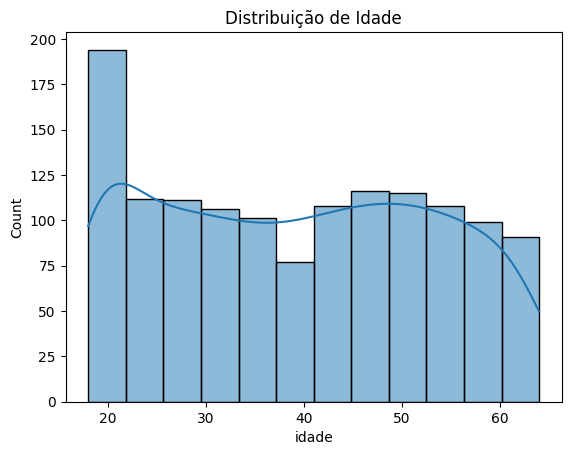

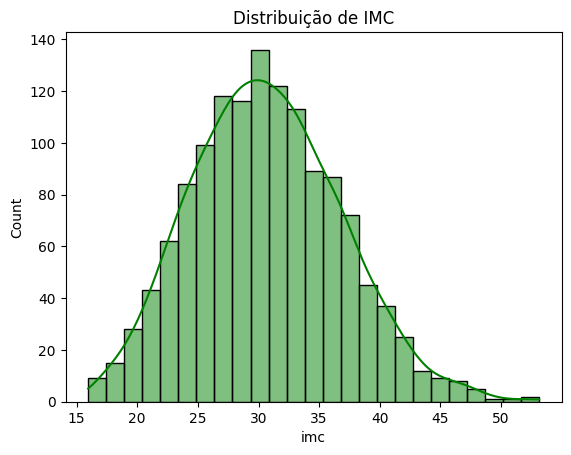

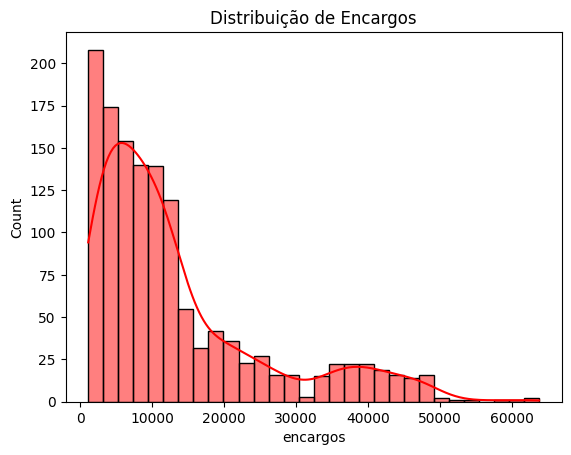

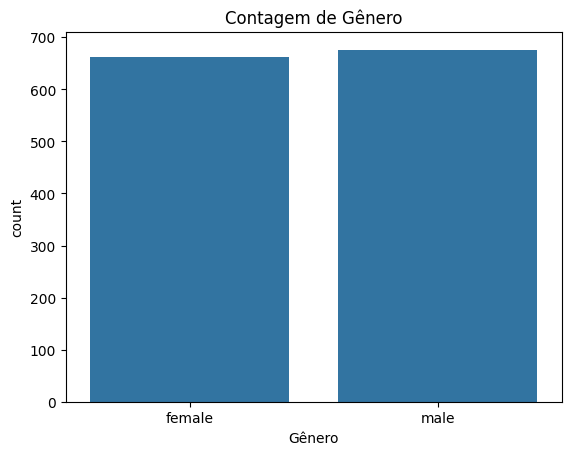

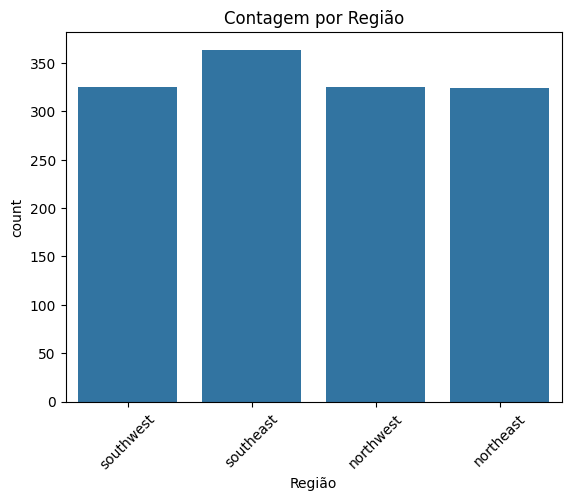


>>> COLUNAS AINDA CATEGÓRICAS (object):
[]
----------------------------------------


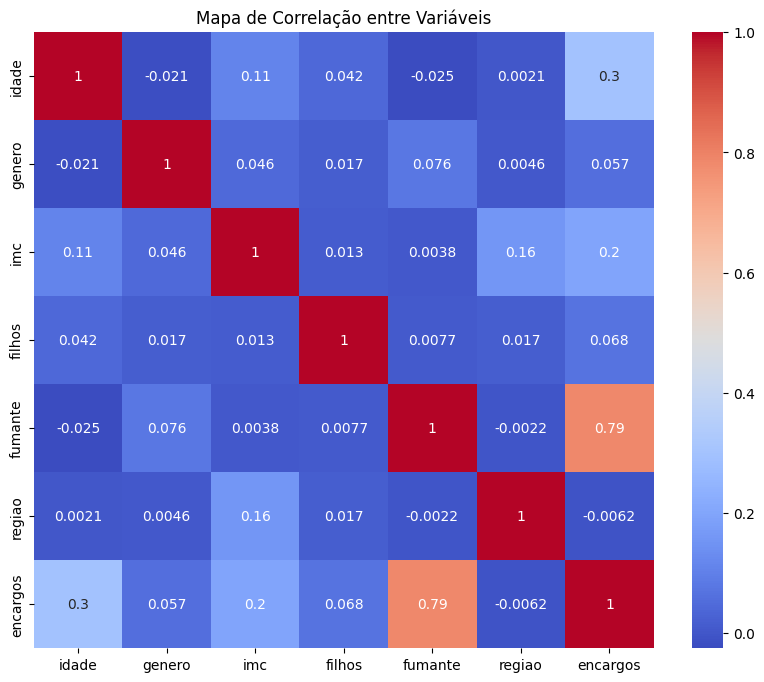

In [2]:
# -----------------------
# EXPLORAÇÃO INICIAL
# -----------------------

print("Informações Gerais do DataFrame:")
print(df.info(), "\n")

print("Estatísticas Descritivas:")
print(df.describe(), "\n")

print("Valores Únicos por Coluna:")
for coluna in df.columns:
    print(f"{coluna}: {df[coluna].nunique()} valores únicos")
print()

print("Valores Nulos:")
print(df.isnull().sum(), "\n")

# -----------------------
# TRANSFORMAR CATEGÓRICOS EM NÚMEROS
# -----------------------

from sklearn.preprocessing import LabelEncoder

mapeamentos = {}

for coluna in ['genero', 'regiao']:          # apenas as colunas solicitadas
    le = LabelEncoder()
    df[coluna] = le.fit_transform(df[coluna])
    mapeamentos[coluna] = dict(zip(le.transform(le.classes_), le.classes_))

# fumante: True/False  -> 1/0
df['fumante'] = df['fumante'].astype(int)

print("Mapeamentos aplicados:")
print(mapeamentos, "\n")

# -----------------------
# VARIÁVEIS AUXILIARES PARA GRÁFICOS
# -----------------------

genero_labels = df['genero'].map(mapeamentos['genero'])
regiao_labels = df['regiao'].map(mapeamentos['regiao'])

# -----------------------
# GRÁFICOS EXPLORATÓRIOS
# -----------------------

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['idade'], kde=True);           plt.title('Distribuição de Idade');       plt.show()
sns.histplot(df['imc'],   kde=True, color='g');plt.title('Distribuição de IMC');         plt.show()
sns.histplot(df['encargos'], kde=True, color='r'); plt.title('Distribuição de Encargos');plt.show()

sns.countplot(x=genero_labels); plt.title('Contagem de Gênero');  plt.xlabel('Gênero');  plt.show()
sns.countplot(x=regiao_labels); plt.title('Contagem por Região'); plt.xlabel('Região');  plt.xticks(rotation=45); plt.show()

# -----------------------
# MAPA DE CORRELAÇÃO
# -----------------------


print("\n>>> COLUNAS AINDA CATEGÓRICAS (object):")
print(df.select_dtypes('object').columns.tolist())
print("-" * 40)          # separador visual

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação entre Variáveis')
plt.show()


In [3]:
# -----------------------
# PRÉ-PROCESSAMENTO PARA MACHINE LEARNING
# -----------------------

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 1. VERIFICAR QUANTIDADE DE NULOS ANTES

print("Valores nulos antes da imputação:")
print(df.isnull().sum())
print("\n")

# Salvar a quantidade de nulos por coluna
nulos_antes = df.isnull().sum()

# 2. IMPUTAR VALORES NULOS (SOMENTE NUMÉRICOS)

num_cols = ['idade', 'imc', 'filhos', 'encargos']
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

# 3. VERIFICAR QUANTIDADE DE NULOS DEPOIS

nulos_depois = df.isnull().sum()

print("Valores nulos depois da imputação:")
print(nulos_depois)
print("\n")

# Calcular quantos valores foram corrigidos por coluna
nulos_corrigidos_por_coluna = nulos_antes - nulos_depois

print("Quantidade de valores nulos corrigidos por coluna:")
print(nulos_corrigidos_por_coluna)
print("\n")

# Calcular o total geral de valores corrigidos
total_nulos_corrigidos = nulos_corrigidos_por_coluna.sum()
print(f"Total geral de valores nulos corrigidos: {total_nulos_corrigidos}")
print("\n")


# 4. DEFINIR VARIÁVEIS INDEPENDENTES (X) E DEPENDENTE (y)

X = df[['idade', 'imc', 'filhos', 'fumante', 'genero', 'regiao']]
y = df['encargos']

# 5. DIVIDIR EM TREINAMENTO E TESTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Pré-processamento concluído!")
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")


Valores nulos antes da imputação:
idade       0
genero      0
imc         0
filhos      0
fumante     0
regiao      0
encargos    0
dtype: int64


Valores nulos depois da imputação:
idade       0
genero      0
imc         0
filhos      0
fumante     0
regiao      0
encargos    0
dtype: int64


Quantidade de valores nulos corrigidos por coluna:
idade       0
genero      0
imc         0
filhos      0
fumante     0
regiao      0
encargos    0
dtype: int64


Total geral de valores nulos corrigidos: 0


Pré-processamento concluído!
Tamanho do conjunto de treino: (1070, 6)
Tamanho do conjunto de teste: (268, 6)


In [4]:
# -----------------------
# PASSO 4: SEPARAR BASE EM TREINO E TESTE
# -----------------------

from sklearn.model_selection import train_test_split

# Definir as variáveis de entrada (X) e de saída (y)
X = df[['idade', 'imc', 'filhos', 'fumante', 'genero', 'regiao']]
y = df['encargos']

# Separar os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Mostrar resultados da separação
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

# -----------------------
# PASSO 5: TREINAMENTO E AVALIAÇÃO DO MODELO
# -----------------------

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Criar o modelo de Regressão Linear
modelo = LinearRegression()

# Treinar o modelo com os dados de treino
modelo.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"\nErro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")


Tamanho do conjunto de treino: (1070, 6)
Tamanho do conjunto de teste: (268, 6)

Erro Quadrático Médio (MSE): 33635210.43
Coeficiente de Determinação (R²): 0.78


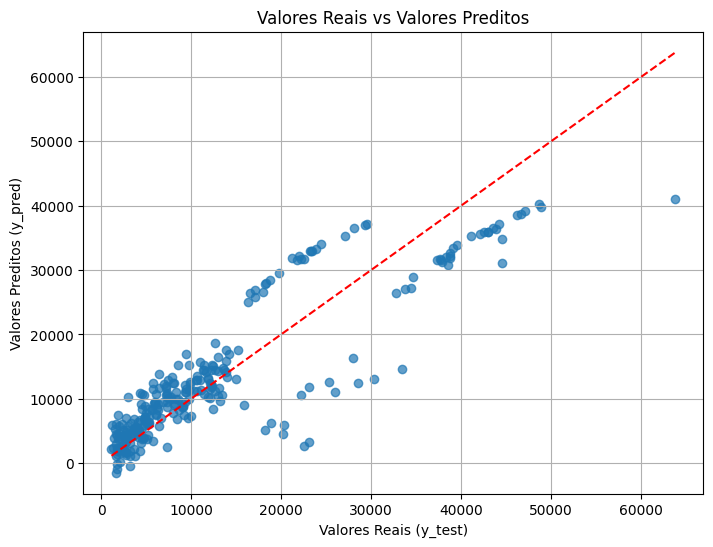

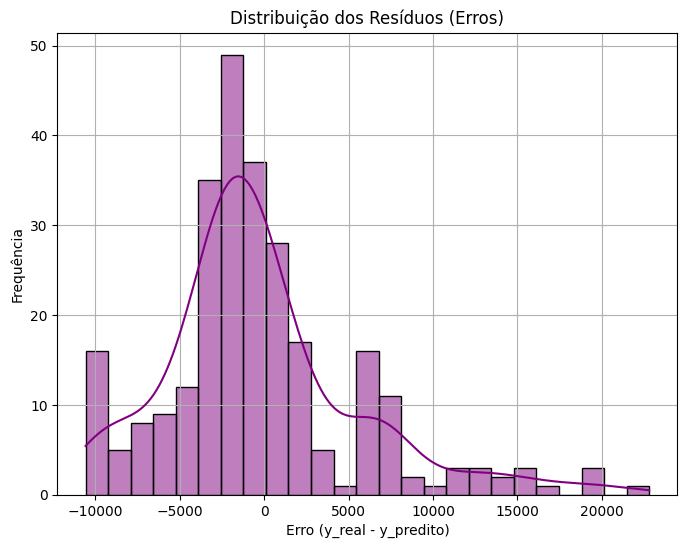

In [5]:
# -----------------------
# PASSO 6: GRÁFICOS DE AVALIAÇÃO
# -----------------------

import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Gráfico Real vs Predito
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Valores Preditos (y_pred)')
plt.title('Valores Reais vs Valores Preditos')
plt.grid(True)
plt.show()

# 2️⃣ Gráfico da Distribuição dos Resíduos
residuos = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuos, kde=True, color='purple')
plt.title('Distribuição dos Resíduos (Erros)')
plt.xlabel('Erro (y_real - y_predito)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


Modelo com tratamento de outliars

In [6]:
# -----------------------
# PARTE 1: GRÁFICO COM DADOS ORIGINAIS (JÁ PRONTO)
# -----------------------

# -----------------------
# PARTE 2: DETECTAR E REMOVER OUTLIERS (IQR)
# -----------------------

# Calcular o IQR dos encargos
Q1 = df['encargos'].quantile(0.25)
Q3 = df['encargos'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover outliers
df_sem_outliers = df[(df['encargos'] >= limite_inferior) & (df['encargos'] <= limite_superior)]

print(f"Tamanho original: {df.shape}")
print(f"Tamanho sem outliers: {df_sem_outliers.shape}")

# -----------------------
# PARTE 3: REFAZER TREINO/TESTE COM BASE SEM OUTLIERS
# -----------------------

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separar variáveis
X = df_sem_outliers[['idade', 'imc', 'filhos', 'fumante', 'genero', 'regiao']]
y = df_sem_outliers['encargos']

# Dividir em treino e teste
X_train_sem_out, X_test_sem_out, y_train_sem_out, y_test_sem_out = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------
# PARTE 4: TREINAR NOVO MODELO
# -----------------------

# Criar e treinar o modelo
modelo_sem_outliers = LinearRegression()
modelo_sem_outliers.fit(X_train_sem_out, y_train_sem_out)

# Fazer novas previsões
y_pred_sem_out = modelo_sem_outliers.predict(X_test_sem_out)

# Avaliar o modelo
mse_sem_out = mean_squared_error(y_test_sem_out, y_pred_sem_out)
r2_sem_out = r2_score(y_test_sem_out, y_pred_sem_out)

print(f"\nMSE sem outliers: {mse_sem_out:.2f}")
print(f"R² sem outliers: {r2_sem_out:.2f}")


Tamanho original: (1338, 7)
Tamanho sem outliers: (1199, 7)

MSE sem outliers: 27568455.25
R² sem outliers: 0.56


Comparando os dois modelos

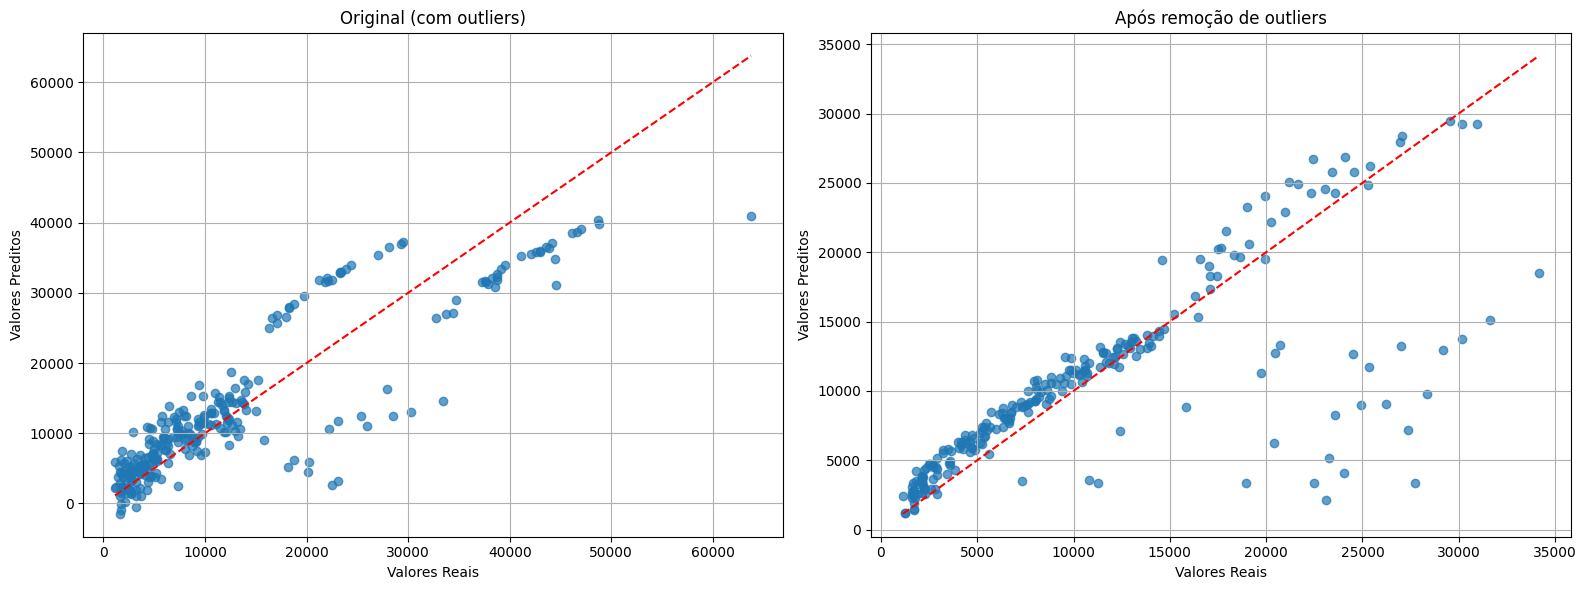

In [7]:
import matplotlib.pyplot as plt

# Comparação de gráficos Real vs Predito

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Gráfico 1: Modelo Original
axes[0].scatter(y_test, y_pred, alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axes[0].set_title('Original (com outliers)')
axes[0].set_xlabel('Valores Reais')
axes[0].set_ylabel('Valores Preditos')
axes[0].grid(True)

# Gráfico 2: Modelo Sem Outliers
axes[1].scatter(y_test_sem_out, y_pred_sem_out, alpha=0.7)
axes[1].plot([y_test_sem_out.min(), y_test_sem_out.max()], [y_test_sem_out.min(), y_test_sem_out.max()], color='red', linestyle='--')
axes[1].set_title('Após remoção de outliers')
axes[1].set_xlabel('Valores Reais')
axes[1].set_ylabel('Valores Preditos')
axes[1].grid(True)

plt.tight_layout()
plt.show()


Metodo de arvore de prediçao

Erro Quadrático Médio (MSE) - Árvore de Decisão: 49002979.21
Coeficiente de Determinação (R²) - Árvore de Decisão: 0.68


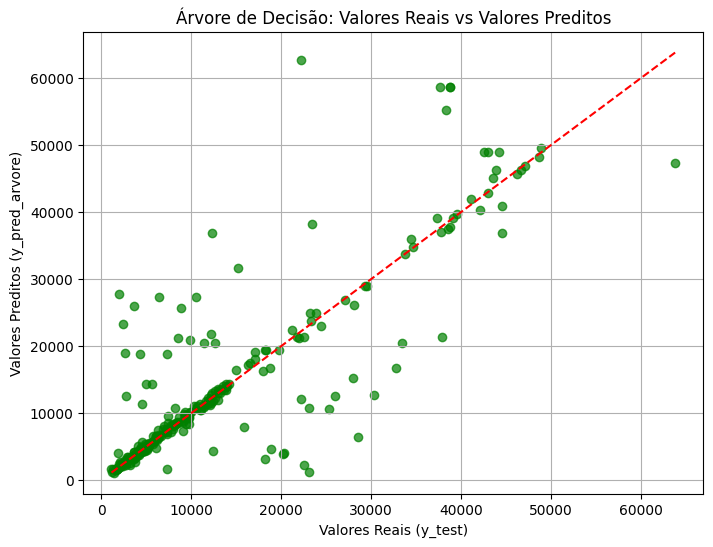

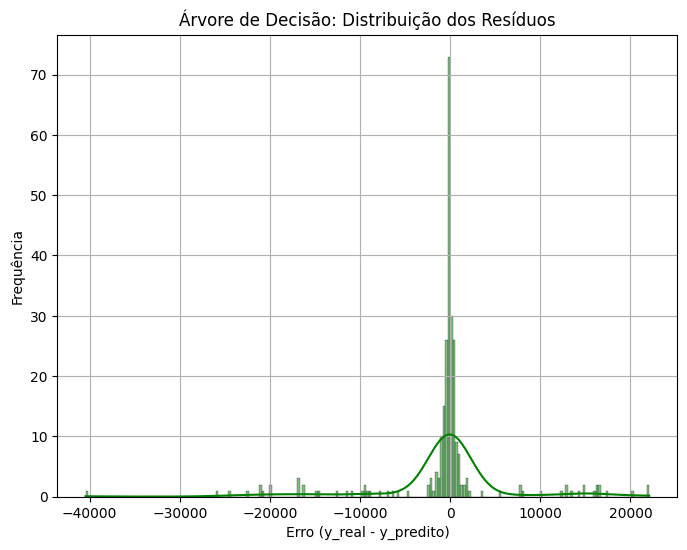

In [8]:
# -----------------------
# MODELAGEM COM ÁRVORE DE DECISÃO
# -----------------------

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Criar o modelo de Árvore de Decisão para Regressão
modelo_arvore = DecisionTreeRegressor(random_state=42)

# Treinar o modelo com os dados de treino (sem outliers, de preferência)
modelo_arvore.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_arvore = modelo_arvore.predict(X_test)

# Avaliar o modelo
mse_arvore = mean_squared_error(y_test, y_pred_arvore)
r2_arvore = r2_score(y_test, y_pred_arvore)

# Mostrar resultados
print(f"Erro Quadrático Médio (MSE) - Árvore de Decisão: {mse_arvore:.2f}")
print(f"Coeficiente de Determinação (R²) - Árvore de Decisão: {r2_arvore:.2f}")

import matplotlib.pyplot as plt

# Gráfico Real vs Predito para Árvore de Decisão
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_arvore, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Valores Preditos (y_pred_arvore)')
plt.title('Árvore de Decisão: Valores Reais vs Valores Preditos')
plt.grid(True)
plt.show()

# Gráfico da distribuição dos resíduos (erros)
residuos_arvore = y_test - y_pred_arvore

plt.figure(figsize=(8,6))
sns.histplot(residuos_arvore, kde=True, color='green')
plt.title('Árvore de Decisão: Distribuição dos Resíduos')
plt.xlabel('Erro (y_real - y_predito)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()



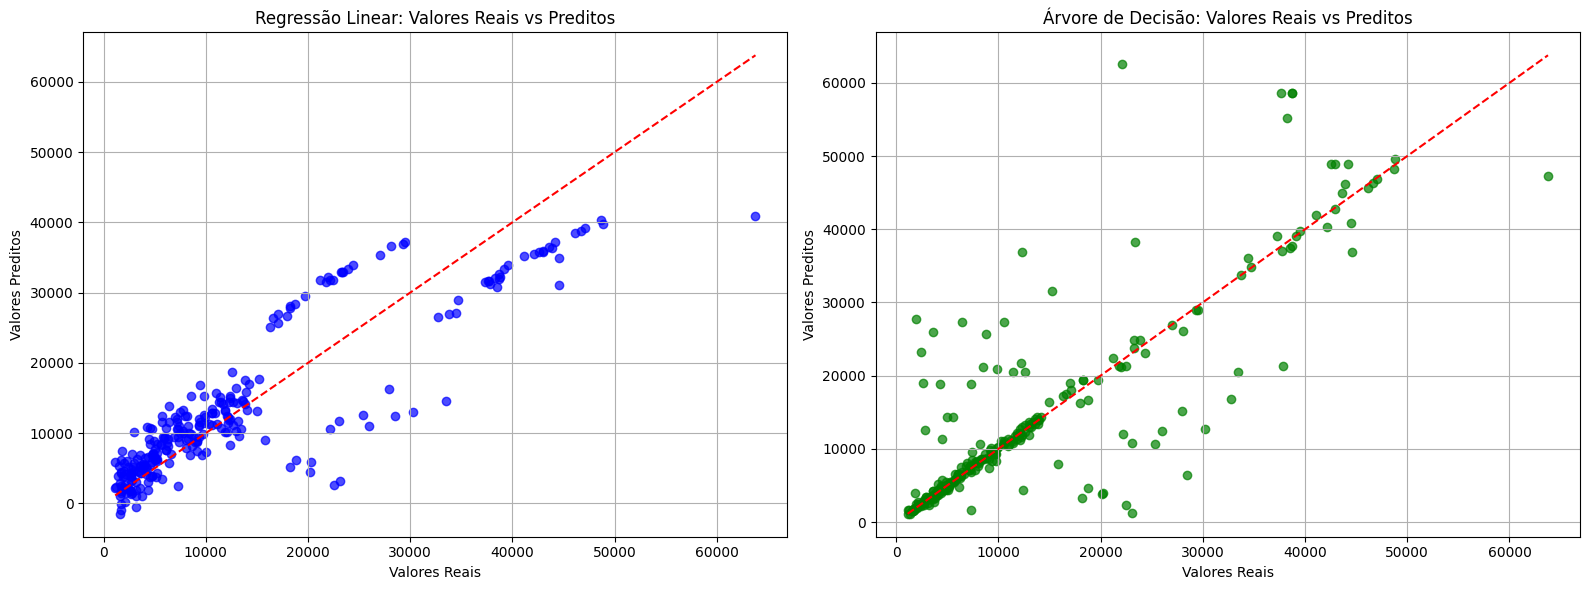

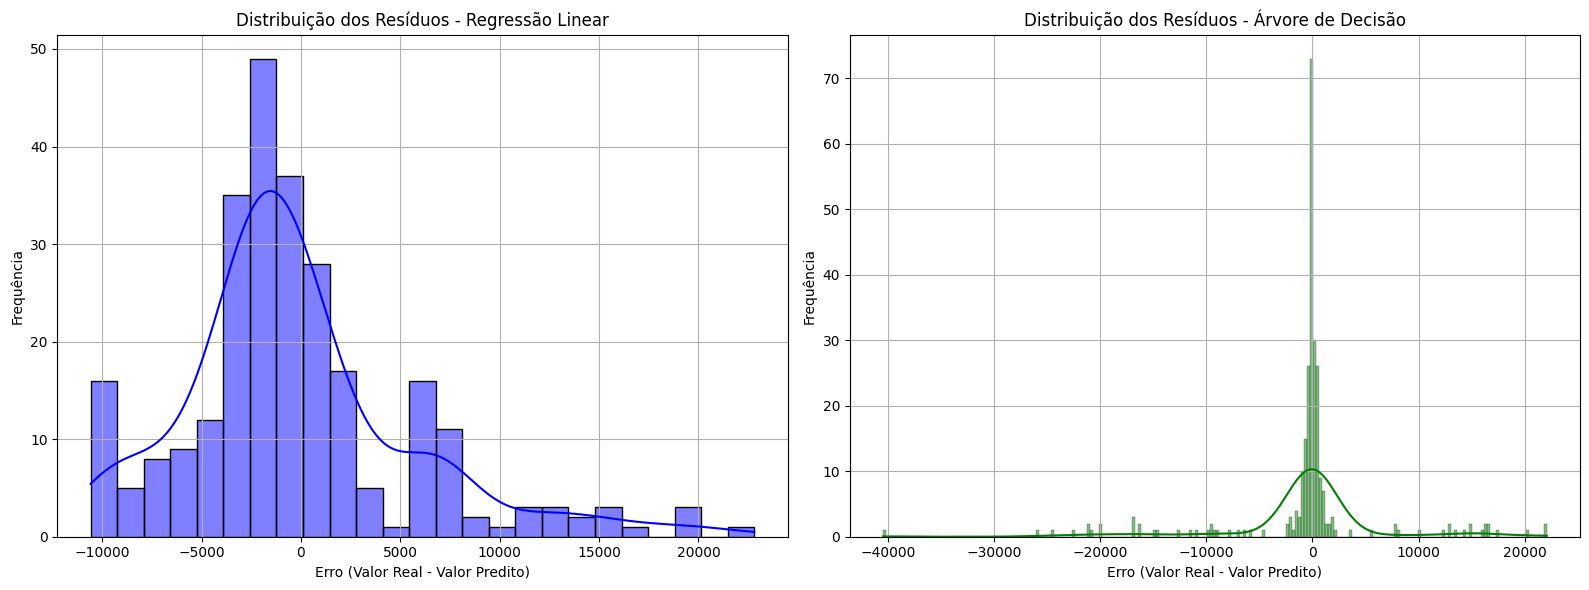

In [9]:
import matplotlib.pyplot as plt

# Comparação Real vs Predito entre os dois modelos
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Gráfico 1: Regressão Linear
axes[0].scatter(y_test, y_pred, alpha=0.7, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axes[0].set_title('Regressão Linear: Valores Reais vs Preditos')
axes[0].set_xlabel('Valores Reais')
axes[0].set_ylabel('Valores Preditos')
axes[0].grid(True)

# Gráfico 2: Árvore de Decisão
axes[1].scatter(y_test, y_pred_arvore, alpha=0.7, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axes[1].set_title('Árvore de Decisão: Valores Reais vs Preditos')
axes[1].set_xlabel('Valores Reais')
axes[1].set_ylabel('Valores Preditos')
axes[1].grid(True)

plt.tight_layout()
plt.show()

import seaborn as sns

# Comparação da Distribuição dos Resíduos

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Resíduos Regressão Linear
residuos_linear = y_test - y_pred
sns.histplot(residuos_linear, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribuição dos Resíduos - Regressão Linear')
axes[0].set_xlabel('Erro (Valor Real - Valor Predito)')
axes[0].set_ylabel('Frequência')
axes[0].grid(True)

# Resíduos Árvore de Decisão
residuos_arvore = y_test - y_pred_arvore
sns.histplot(residuos_arvore, kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribuição dos Resíduos - Árvore de Decisão')
axes[1].set_xlabel('Erro (Valor Real - Valor Predito)')
axes[1].set_ylabel('Frequência')
axes[1].grid(True)

plt.tight_layout()
plt.show()

